# Reputation Era
### How does the reputation of artists changes in time?

This notebook contains the data mining and data analysis of the project Reoutation Era, developed by Erica Andreose, Giorgia Crosilla and Daniele Spedicati in the context of the exam of Information Visualization. 

The project aims to explore the oscillations in reputation that different artists face during time through data. 

The concept of reputation is difficult to define and many definition could be given [inserire qualche riferimento agli articoli.]

## The Datasets
In this project, we focused on three main variables to define the reputation of an artist:
* Auctions [dire sorgente dati]
* Pubblications about the artist [ dire sorgente dati]
* One-Man Exhibition 

## Our Case studies - De Kooning and Klimt
As an exaple for our study we took two well-known artist, De Kooning and Klimt. 
### De cooning - a "ground trouth" case. 
### Klimt - a research case.

# Working with data

In [1]:
# import all useful libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. Auctions dataset

In [2]:
# import the auctionons dataset as a Pandas DataFrame
pd.set_option('display.max_columns', None)
getty2 = pd.read_csv("auctions.csv", sep=";", encoding="iso-8859-1")
getty2

,Column1,artist,country,yearOfBirth,yearOfDeath,name,year,price,material,height,width,link,source,dominantColor,brightness,ratioUniqueColors,thresholdBlackPerc,highbrightnessPerc,lowbrightnessPerc,CornerPer,EdgePer,FaceCount,soldtime
0,0.0,Mario A,Swiss,1959,NaN,The world is beautyful #5,2004,53150.0,laserchrome_print_diasec,29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,980.0,25.0,6574.0,75.0,2156.0,37.0,402.0,10.0,NaN
1,1.0,Mario A,Swiss,1959,NaN,The world is beautyful #13,2004,73830.0,laserchrom_print_(diasec.),29.53,39.37,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,19.0,6617.0,1521.0,465.0,152.0,728.0,0.0,NaN
2,2.0,A E Cremer,French,20thC,NaN,Spot Lights,NaN,20900.0,black-painted_metal,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2120.0,5.0,2017.0,0.0,1756.0,39.0,415.0,0.0,NaN
3,3.0,A G Schultz & Co.,American,est1890s,NaN,Sugar/Sweetmeat Baskets,NaN,6150.0,Sterling_Silver,6.5,5.75,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,730.0,18.0,830.0,1374.0,3574.0,358.0,1313.0,0.0,NaN
4,4.0,A G Schultz & Co.,American,est1890s,NaN,An American Silver Five-piece Tea And Coffee S...,1908,81250.0,silver,NaN,NaN,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,2160.0,2.0,1126.0,0.0,627.0,125.0,1295.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44097,41290.0,Mark Rothko,American,1903.0,19700.0,Untitled,1961,17000000.0,oil_on_canvas,93.0,80.0,http://artsalesindex.artinfo.com/asi/lots/2495060,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1070.0,6.0,9899.0,0.0,0.0,14.0,32.0,0.0,1997-11-18 00:00:00
44098,41291.0,Mark Rothko,American,1903.0,19700.0,Untitled,1968,3000000.0,acrylic_on_paper_on_canvas,24.0,18.0,http://artsalesindex.artinfo.com/asi/lots/2495081,http://artinfo-images-350.s3.amazonaws.com/177...,reds,1340.0,1.0,6856.0,0.0,0.0,56.0,45.0,0.0,1997-11-18 00:00:00
44099,41292.0,Mark Rothko,American,1903.0,19700.0,Untitled,1959,2800000.0,oil_on_paper_laid_on_masonite,38.0,25.0,http://artsalesindex.artinfo.com/asi/lots/2495098,http://artinfo-images-350.s3.amazonaws.com/177...,blacks,1100.0,7.0,5348.0,66.0,475.0,14.0,107.0,0.0,1997-11-18 00:00:00
44100,41293.0,Mark Rothko,American,1903.0,19700.0,"Green, White, Green on Blue",1969,3229380.0,oil_on_paper_on_board,71.0,41.0,http://artsalesindex.artinfo.com/asi/lots/2251703,http://artinfo-images-350.s3.amazonaws.com/S11...,blacks,250.0,8.0,9498.0,947.0,4295.0,22.0,197.0,0.0,1995-11-29 00:00:00


### a. Brief overview

In [3]:
# creating a dictionary with the frequency of each artist

from collections import Counter
liss = {}
for column_name in getty2.columns:
    if column_name == "artist":
        for value in getty2[column_name]:
            if value not in liss:
                liss[value] = 1
            else:
                liss[value] += 1
k = Counter(liss)
 
# Finding 20 highest values
high = k.most_common(20) 
 
print("Initial Dictionary:")
print(liss, "\n")
print ('Total artist', len(liss))
 
 
print("Dictionary with 3 highest values:")
print("Keys: Values")
 
for i in high:
    print(i[0]," :",i[1]," ")

Initial Dictionary:
{'Mario A': 2, 'A E Cremer': 1, 'A G Schultz & Co.': 2, 'A H': 1, 'A H G': 1, 'A K': 1, 'A Kassen': 1, 'A Lao': 4, 'A M': 1, 'A Sun Wu': 4, "Maria A'Becket": 4, "A'erbai": 1, 'A-One': 2, 'A.CE': 1, 'A1one': 6, 'Dirk van der Aa': 6, 'Jorgen Aabye': 5, 'Christian Aabye-Talge': 1, 'Attributed to  Hans von Aachen': 2, 'Circle of  Hans von Aachen': 2, 'Studio of  Hans von Aachen': 1, 'After  Hans von Aachen': 1, 'Hans von Aachen': 1, 'Peder Pedersen Aadnes': 1, 'Arvid Aae': 2, 'Carl Frederic Aagaard': 4, 'Martin Aagaard': 2, 'H P Aaland': 1, 'Alvar Aalto': 11, nan: 2837, 'Ilmari Aalto': 4, 'Veikko Aaltona': 5, 'Aarre Aaltonen': 2, 'Waino Aaltonen': 7, 'Martin Aalund': 3, 'Asbjorn Aamodt': 2, 'Susanne Aamund': 1, 'Jos Aanraad': 3, 'Leny Aardse': 1, 'Eero Aarnio': 7, 'Jessie Aaron': 9, 'John Aaron': 1, 'Joseph Aaron': 5, 'Michel Aaron': 1, 'George Aarons': 4, 'Slim Aarons': 2, 'Carl Aarsleff': 2, 'Hans Aarsman': 1, 'Nicolaas Aartmann': 4, 'Pieter Jan Aarts': 1, 'Alf Jorgen

In [4]:
# Explore the distribution of data in our

# Extract keys with value 1
keys_with_value_1 = [key for key, value in k.items() if value == 1]

# Count of keys with value 1
count_keys_with_value_1 = len(keys_with_value_1)


# Extract keys with value between 1 and 5
keys_with_value_minor_5 = [key for key, value in k.items() if 1 < value <= 5]

# Count of keys with value 5
count_keys_with_value_minor_5 = len(keys_with_value_minor_5)


# extract keys with value between 5 and 10
keys_with_value_minor_10= [key for key, value in k.items() if 5 < value <= 10]

# Count of keys with value between 5 and 10
count_keys_with_value_minor_10 = len(keys_with_value_minor_10)


# extract keys with value greater than 10
keys_with_value_greater_10= [key for key, value in k.items() if value > 10]

# Count of keys with value greater than 10
count_keys_with_value_greater_10 = len(keys_with_value_greater_10)
    

# Organise data in a df

data = {'labels':['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions'],
        'values' : [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
}

auctions_count = pd.DataFrame(data)

# Calculate the sum of 'values' column
total_value = auctions_count['values'].sum()

# Add a new row with the label "Artists in the dataset" and the sum of all values
new_row = {'labels': ['Artists in the dataset'], 'values': [total_value]}
total_df = pd.DataFrame(new_row)
# Concatenate the original DataFrame with the new total row DataFrame
auctions_count = pd.concat([auctions_count, total_df], ignore_index=True)
# Calculate percentages
auctions_count['percentage'] = (auctions_count['values'] / total_value) * 100


auctions_count


,labels,values,percentage
0,Artist with one auction,4044,46.919596
1,Artists with maximum 5 auctions,3363,39.018448
2,Artist with maximum 10 auctions,1195,13.864717
3,Artists with more than 10 auctions,17,0.197239
4,Artists in the dataset,8619,100.000000


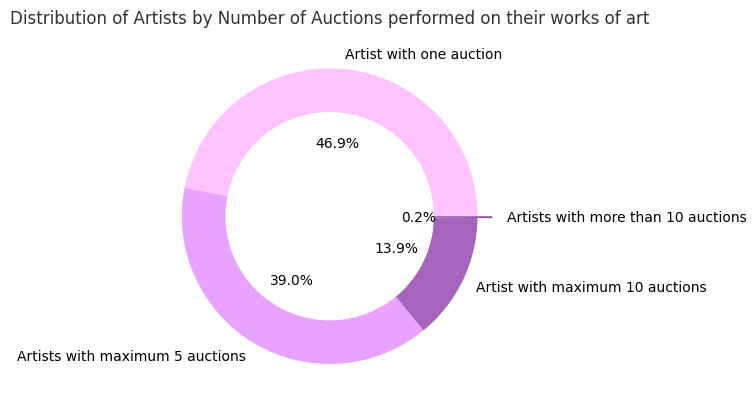

In [5]:
#create donut chart from data above

# settings
sizes = [count_keys_with_value_1, count_keys_with_value_minor_5, count_keys_with_value_minor_10, count_keys_with_value_greater_10]
labels = ['Artist with one auction', 'Artists with maximum 5 auctions', 'Artist with maximum 10 auctions', 'Artists with more than 10 auctions']
colors = ['#FFC3FF','#E9A2FF','#A664BC','#86469C']
explode = [0, 0, 0, 0.1]
# Create a pieplot
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=0, pctdistance=0.5)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Artists by Number of Auctions performed on their works of art', color = '#352f36')

plt.show()

In [6]:
#create bar chart of frequency of auctions for artists with more than 10 auctions performed on their works.

#create dictionary with only above 10
greater_10_dict = {}
for key, value in high:
    if value > 10 :
        greater_10_dict[key] = value

data = {'artist': greater_10_dict.keys(), 'number of auctions': greater_10_dict.values()}


greater_10_df = pd.DataFrame(data)

greater_10_df

,artist,number of auctions
0,Pablo Picasso,8975
1,Andy Warhol,6976
2,NaN,2837
3,Gustav Klimt,424
4,Paul Cezanne,384
5,Willem de Kooning,381
6,Edvard Munch,371
7,After Pablo Picasso,339
8,Vincent van Gogh,133
9,Mark Rothko,133


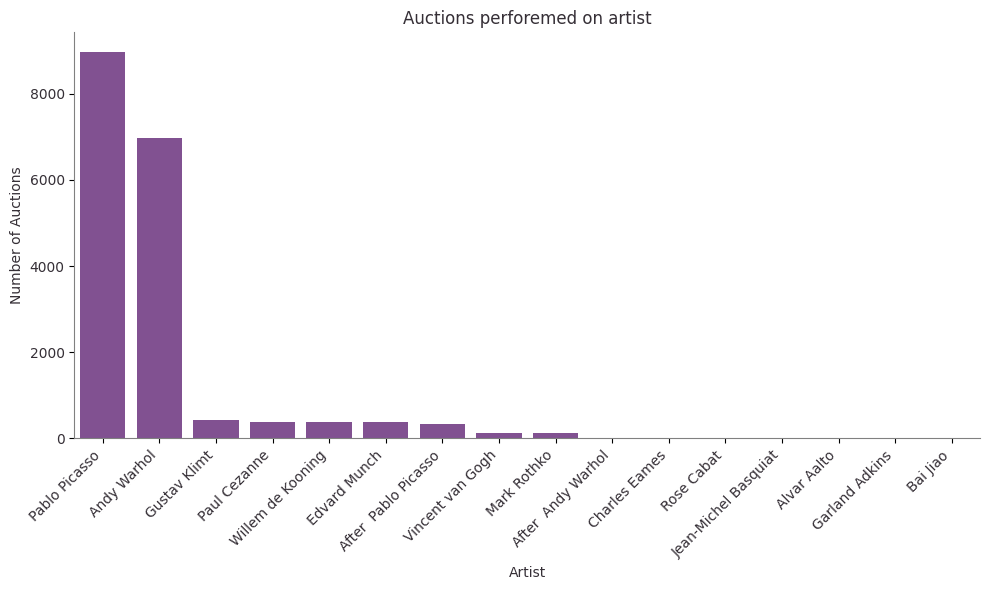

In [7]:
# create a barplot of the artist with more than 10 aucitons performed on their works

plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray'})

sns.barplot(x='artist', y='number of auctions', data=greater_10_df, color='#86469C')
plt.xticks(rotation=45, ha='right', color = '#352f36') 
plt.yticks(color = '#352f36')
plt.title('Auctions perforemed on artist', color = '#352f36')
plt.xlabel('Artist', color = '#352f36')
plt.ylabel('Number of Auctions', color = '#352f36')
sns.despine()
plt.tight_layout()
plt.show()

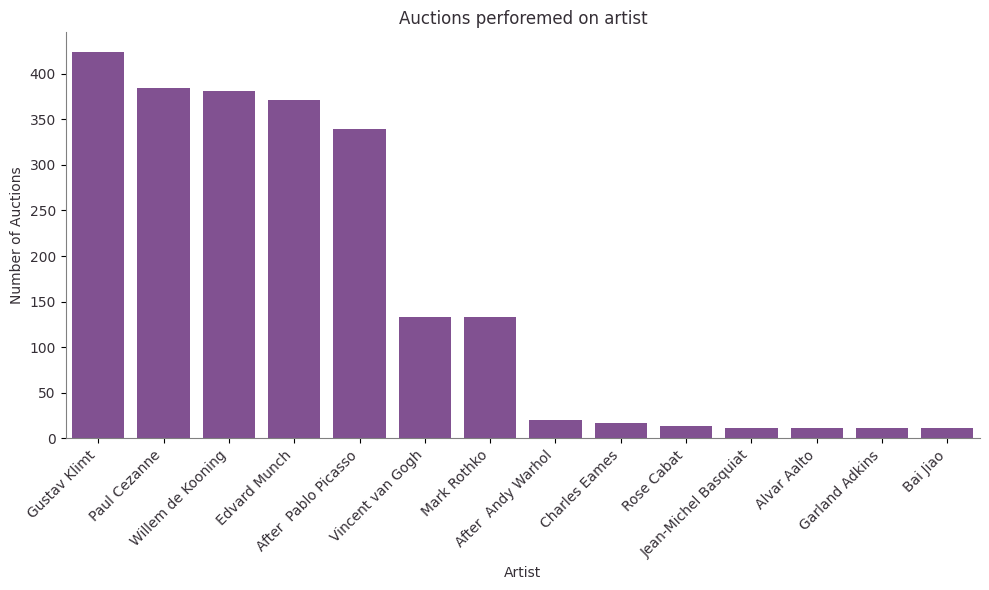

In [258]:
# barplot without the top two
greater_10_df_filtered = greater_10_df.iloc[2:]

plt.figure(figsize=(10, 6))

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray'})

sns.barplot(x='artist', y='number of auctions', data=greater_10_df_filtered, color='#86469C')
plt.xticks(rotation=45, ha='right', color = '#352f36') 
plt.yticks(color = '#352f36')
plt.title('Auctions perforemed on artist', color = '#352f36')
plt.xlabel('Artist', color = '#352f36')
plt.ylabel('Number of Auctions', color = '#352f36')
sns.despine()
plt.tight_layout()
plt.show()

In [9]:
#save as csv
greater_10_df_filtered = greater_10_df.iloc[3:]

greater_10_df_filtered.to_csv('../docs//data/greater_10_filtered.csv', index=False)


This preliminary research shows us that the data in our dataset are not omogeneus. Although, we have a small group of istances that present an adequate number of data. The two artist that we are focusing on in this study (De Kooning and Klimt) are both in this subset. This encourage us to continue in our analysis.

# Studying two artists: De Kooning and Klimt
## 1. Times a work has been sold

In [10]:
# Count De Kooning frequency

liss_dk = []
for column_name in getty2.columns:
    if column_name == "artist":
        for value in getty2[column_name]:
            if value == "Willem de Kooning":
                liss_dk.append(value)
print(len(liss_dk))

381


Get only results related to sales on De Kooning works. Artworks that do not possess data about price or soldtime have been deleted from the dataset.
The dataset does not possess any data related to sellers and buyers. 
In this example we notice that 307 works over a total of 381 possess data about price and time of the transaction. 

In [11]:
final_auctions_dk = getty2.loc[getty2["artist"] == "Willem de Kooning", ["artist", "name", "price", "soldtime"]].copy()

final_auctions_dk.dropna(subset=["price", "soldtime"], inplace=True)


# Extract the day from the "soldtime" column
final_auctions_dk["soldtime"] = final_auctions_dk["soldtime"].str.split("-").str[0]

final_auctions_dk.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file
final_auctions_dk.to_csv('auctions_data_DK.csv', index=False)

# Display the modified DataFrame
final_auctions_dk.head()


,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.0,2014
1,Willem de Kooning,Untitled,20450000.0,2014
2,Willem de Kooning,Untitled,1125000.0,2014
3,Willem de Kooning,Untitled XVIII,48690000.0,2014
4,Willem de Kooning,Untitled XXIV,175250000.0,2014


In [12]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_dk.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_dk = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_dk.reset_index(drop=True)

name_counts.head()


,artist,name,count
0,Willem de Kooning,Beach Scene (G.23),1
1,Willem de Kooning,Beach Scene (Graham 23),1
2,Willem de Kooning,Big,1
3,Willem de Kooning,Black And White Rome E,1
4,Willem de Kooning,Calm Digger (Graham 4),1


From this initial overview we can notice that probably there are more than one "Untitled" work (the chances that one work was sold 90 times in eight years are very low). Our dataset did not provide a unique identifier for each work, which makes impossible to disambiguate it. 

In [13]:
# count the number of works sold how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_dk['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_dk = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_dk = count_data_dk.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_dk['times_sold'] = 'sold ' + count_data_dk['times_sold'].astype(str) + ' times'

count_data_dk


,times_sold,count
0,sold 1 times,111
1,sold 2 times,22
2,sold 3 times,10
3,sold 4 times,1
4,sold 5 times,2
5,sold 6 times,3
6,sold 90 times,1


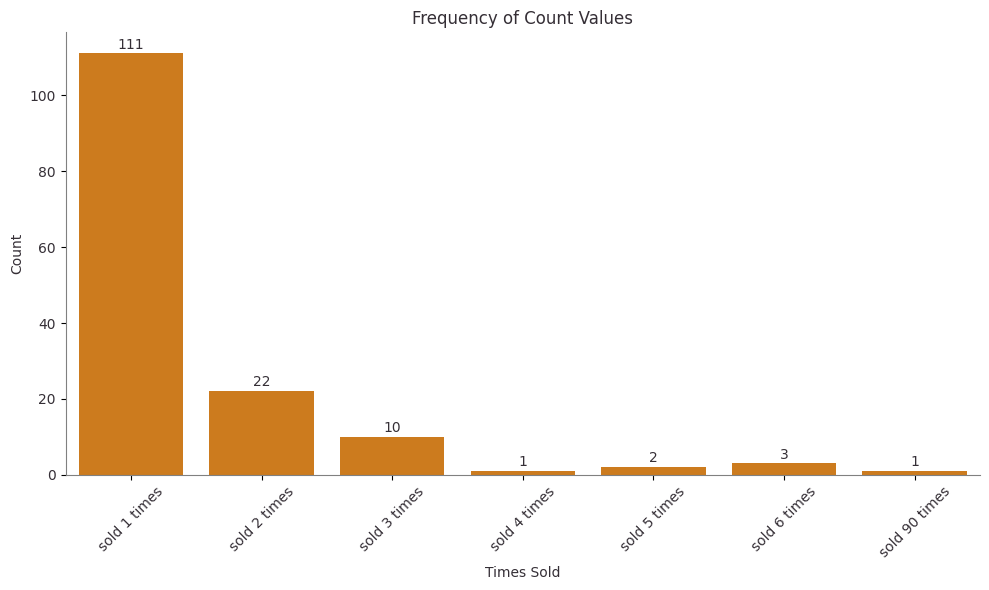

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot

# Set the style and color of the axes
sns.set_style({'axes.edgecolor': 'gray'})


plt.figure(figsize=(10, 6))
sns.barplot(x='times_sold', y='count', data=count_data_dk, color='#E97D01')
plt.title('Frequency of Count Values', color = '#352f36')
plt.xlabel('Times Sold', color = '#352f36')
plt.ylabel('Count', color = '#352f36')
plt.xticks(rotation=45, color = '#352f36')
plt.yticks(color = '#352f36')

# Add exact value on top of each bar
for index, value in enumerate(count_data_dk['count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', color = '#352f36')

sns.despine()

plt.tight_layout()
plt.show()



In [15]:
# Count De Kooning frequency

liss_k = []
for column_name in getty2.columns:
    if column_name == "artist":
        for value in getty2[column_name]:
            if value == "Gustav Klimt":
                liss_k.append(value)
print(len(liss_k))

424


In [125]:
# Klimt data

final_auctions_k = getty2[["artist", "name", "price", "soldtime"]].copy()
final_auctions_k= final_auctions_k[final_auctions_k["artist"] == "Gustav Klimt"].copy()

final_auctions_k.reset_index(drop=True, inplace=True)

for idx, row in final_auctions_k.iterrows():
    if pd.isna(row["price"]) and pd.isna(row["soldtime"]):
        final_auctions_k.drop(idx, inplace=True)
        
dayy = []
for i in final_auctions_k['soldtime']:
    string_representation = str(i)
    split_parts = string_representation.split('-')
    day = split_parts[0]
    dayy.append(day)
final_auctions_k['soldtime'] = dayy
        

final_auctions_k.reset_index(drop=True, inplace=True)
final_auctions_k.to_csv('auctions_data_k.csv', index=False)
final_auctions_k

,artist,name,price,soldtime
0,Gustav Klimt,Vorgebeugt sitzende Aktfigur,174600.00,2014
1,Gustav Klimt,"Stehender Frauenakt Mit Erhobenem Linkem Bein,...",225000.00,2014
2,Gustav Klimt,Nach Links Sitzender Halbakt,200000.00,2014
3,Gustav Klimt,Allegory of Agriculture,200000.00,2014
4,Gustav Klimt,MÃ¤dchenbrustbild Von Vorne Mit HÃ¤ubchen (Por...,2691170.00,2014
5,Gustav Klimt,Aktstudie einer TÃ¤ nzerin,212770.00,2014
6,Gustav Klimt,"Portrait of a Child with Flowers in her Hair, ...",1835650.00,2014
7,Gustav Klimt,Das Werk von Gustav Klimt,1140000.00,2014
8,Gustav Klimt,"Frauenkopf Studie fÃ¼r die ""Unkeuschheit"" des ...",515090.00,2013
9,Gustav Klimt,I Kunstausstellung der Vereinigung Bildender K...,1111410.00,2013


In [126]:
#Check if there are works that have been sold more than once

name_counts = final_auctions_k.groupby(['artist', 'name']).size().reset_index(name='count')

name_counts_sorted_k = name_counts.sort_values(by='count', ascending=False)

name_counts_sorted_k.reset_index(drop=True)

,artist,name,count
0,Gustav Klimt,Lovers,3
1,Gustav Klimt,Male nude,3
2,Gustav Klimt,Nude,3
3,Gustav Klimt,Adele Bloch-Bauer,2
4,Gustav Klimt,Seated nude,2
5,Gustav Klimt,Liegender Akt,2
6,Gustav Klimt,Seated woman,2
7,Gustav Klimt,Standing female nude,2
8,Gustav Klimt,Seated female nude,2
9,Gustav Klimt,Liegender Akt nach rechts,2


In [127]:
# count the number of works sold how many times

# Count the occurrences of each count value
count_freq = name_counts_sorted_k['count'].value_counts().sort_index()

# Create a DataFrame to store the count frequency data
count_data_k = pd.DataFrame({'times_sold':count_freq.index , 'count': count_freq.values})

count_data_k = count_data_k.sort_values(by='times_sold', ascending=True)

# Modify the 'times_sold' column to become a string
count_data_k['times_sold'] = 'sold ' + count_data_k['times_sold'].astype(str) + ' times'

count_data_k


,times_sold,count
0,sold 1 times,225
1,sold 2 times,11
2,sold 3 times,3


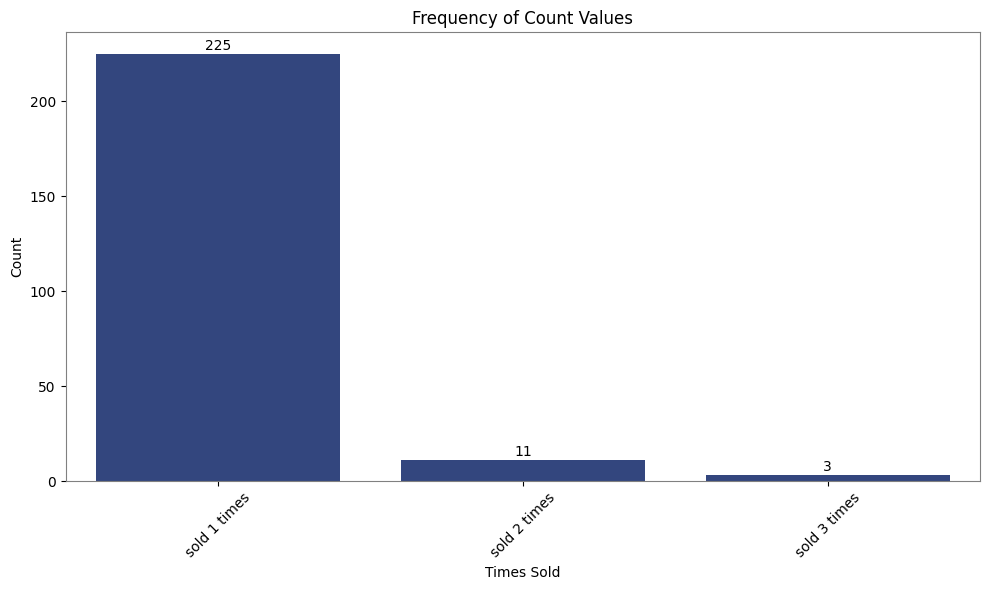

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='times_sold', y='count', data=count_data_k, color='#26408B')
plt.title('Frequency of Count Values')
plt.xlabel('Times Sold')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add exact value on top of each bar
for index, value in enumerate(count_data_k['count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [20]:
#Combine data

# Left merge df_dk and df_k on 'times_sold' column
soldtime_merge_df = pd.merge(count_data_dk, count_data_k, on='times_sold', how='left')

# Fill NaN values with 0
soldtime_merge_df = soldtime_merge_df.fillna(0)

# Rename the 'count' columns
soldtime_merge_df = soldtime_merge_df.rename(columns={'count_x': 'de_kooning_count', 'count_y': 'klimt_count'})

# Convert count columns to integer data type
soldtime_merge_df['de_kooning_count'] = soldtime_merge_df['de_kooning_count'].astype(int)
soldtime_merge_df['klimt_count'] = soldtime_merge_df['klimt_count'].astype(int)

soldtime_merge_df


,times_sold,de_kooning_count,klimt_count
0,sold 1 times,111,225
1,sold 2 times,22,11
2,sold 3 times,10,3
3,sold 4 times,1,0
4,sold 5 times,2,0
5,sold 6 times,3,0
6,sold 90 times,1,0


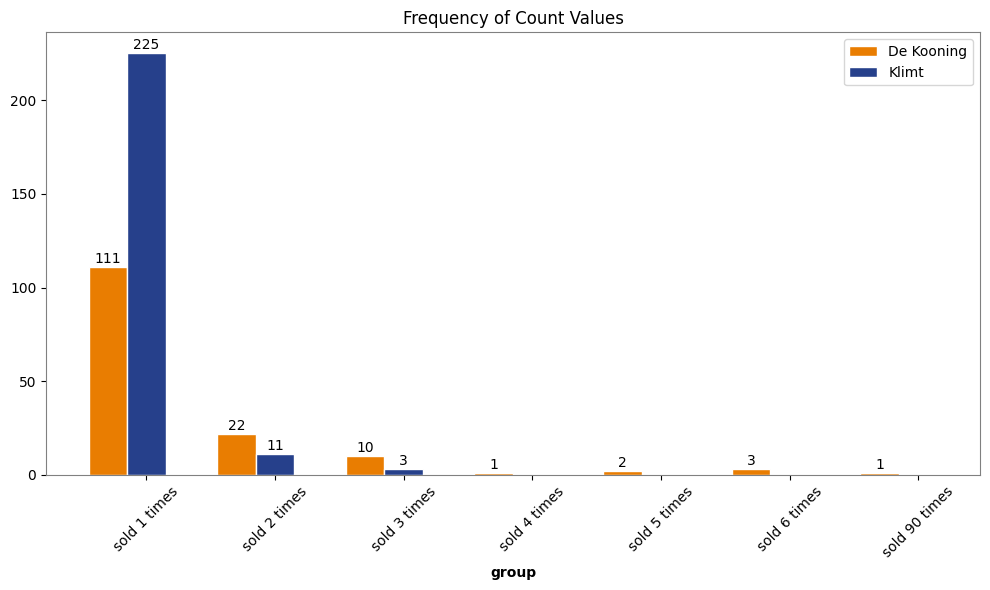

In [21]:
# set width of bars
barWidth = 0.3
 
# set heights of bars
bars1 = soldtime_merge_df['de_kooning_count']
bars2 = soldtime_merge_df['klimt_count']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='#E97D01', width=barWidth, edgecolor='white', label='De Kooning')
plt.bar(r2, bars2, color='#26408B', width=barWidth, edgecolor='white', label='Klimt')

for i, (dk_count, kl_count) in enumerate(zip(soldtime_merge_df['de_kooning_count'], soldtime_merge_df['klimt_count'])):
    if dk_count > 0:
        plt.text(i, dk_count + 0.5, str(dk_count), ha='center', va='bottom')
    if kl_count > 0:
        plt.text(i + barWidth, kl_count + 0.5, str(kl_count), ha='center', va='bottom')
 
# Add xticks on the middle of the group bars
plt.title('Frequency of Count Values')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], soldtime_merge_df['times_sold'], rotation=45)


plt.tight_layout()
 
# Create legend & Show graphic
plt.legend()
plt.show()


plt.show()

In [22]:
#save as csv
soldtime_merge_df.to_csv('../docs//data/soldtime_merge_df.csv', index=False)


This first analys shows the dinamicity of the two artist: while more works by Klimt were sold, De Kooning's ones seem to be more mobile, capturing more the interst of the market???.

## 2. Sellings per year

In [130]:
import pandas as pd


# Count the values in the 'soldtime' column
soldtime_counts_dk = final_auctions_dk['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_dk.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_dk = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_dk



,soldtime,count
1,2008,48
6,2009,17
5,2010,34
2,2011,45
3,2012,41
0,2013,82
4,2014,40


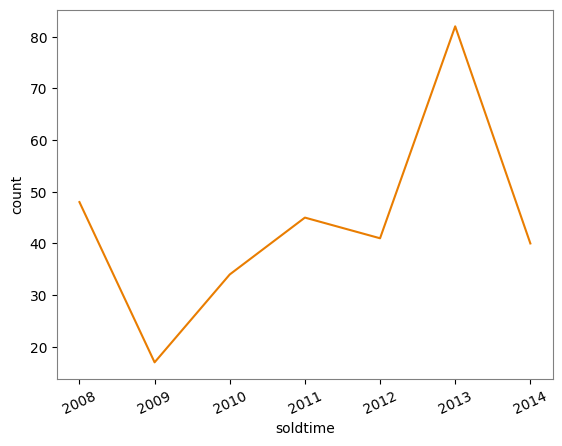

In [129]:
# plot timeline

sns.lineplot(x = "soldtime", y = "count", data = soldtime_counts_df_sorted_dk, color='#E97D01') 
  
plt.xticks(rotation = 25)

plt.show()

In [131]:
import pandas as pd

# Assuming new_dataframe_dk is your DataFrame
# Assuming the column name is 'soldtime'

# Count the values in the 'soldtime' column
soldtime_counts_k = final_auctions_k['soldtime'].value_counts()

# Convert the Series to a DataFrame if needed
soldtime_counts_df = soldtime_counts_k.reset_index()
soldtime_counts_df.columns = ['soldtime', 'count']

# Sort the DataFrame by the 'soldtime' column
soldtime_counts_df_sorted_k = soldtime_counts_df.sort_values(by='soldtime')

# Display the sorted DataFrame
soldtime_counts_df_sorted_k



,soldtime,count
3,2004,21
0,2005,61
2,2006,32
1,2007,51
7,2008,15
6,2009,17
4,2010,18
8,2011,9
5,2012,17
10,2013,7


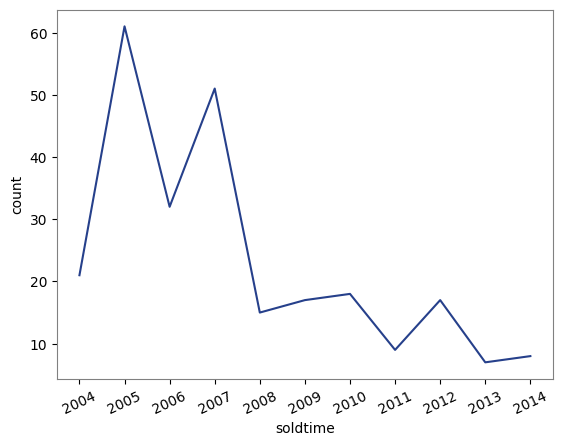

In [132]:
# plot timeline

sns.lineplot(x = "soldtime", y = "count", data = soldtime_counts_df_sorted_k, color='#26408B') 
  
plt.xticks(rotation = 25)

plt.show()

In [137]:
import pandas as pd

# Convert 'soldtime' columns to int64 if they are not already
soldtime_counts_df_sorted_dk['soldtime'] = soldtime_counts_df_sorted_dk['soldtime'].astype('int64')
soldtime_counts_df_sorted_k['soldtime'] = soldtime_counts_df_sorted_k['soldtime'].astype('int64')

# Right merge the DataFrames on the 'soldtime' column
selling_per_year = pd.merge(soldtime_counts_df_sorted_dk, soldtime_counts_df_sorted_k, on='soldtime', how='right')

# Rename the count columns
selling_per_year.rename(columns={'count_x': 'de kooning count', 'count_y': 'klimt count'}, inplace=True)

# Replace NaN values with 0
selling_per_year.fillna(0, inplace=True)

# Convert the count columns to int64
selling_per_year['de kooning count'] = selling_per_year['de kooning count'].astype('int64')
selling_per_year['klimt count'] = selling_per_year['klimt count'].astype('int64')

# Sort by 'soldtime'
selling_per_year.sort_values(by='soldtime', inplace=True)

# Display the merged and sorted DataFrame
selling_per_year

,soldtime,de kooning count,klimt count
0,2004,0,21
1,2005,0,61
2,2006,0,32
3,2007,0,51
4,2008,48,15
5,2009,17,17
6,2010,34,18
7,2011,45,9
8,2012,41,17
9,2013,82,7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


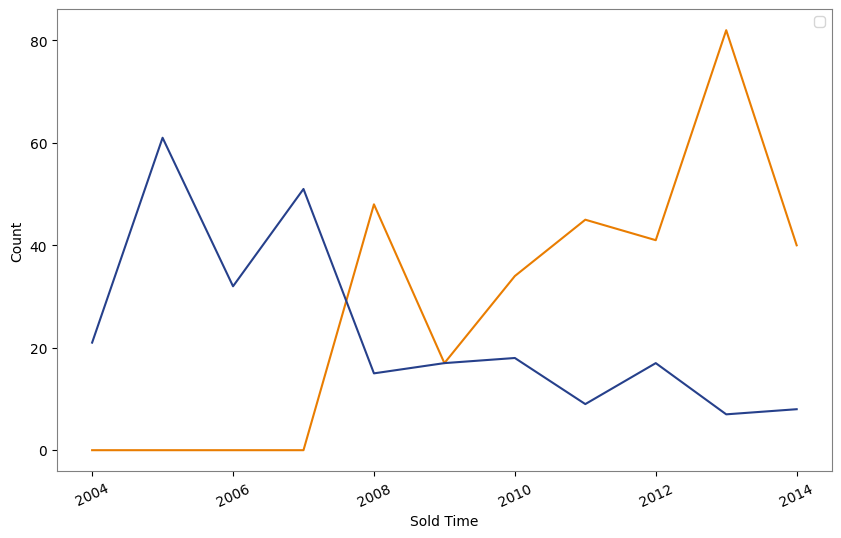

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure and axes
plt.figure(figsize=(10, 6))

# Plot "de kooning count"
ax = sns.lineplot(x="soldtime", y="de kooning count", data=selling_per_year, color='#E97D01')

# Plot "klimt count" on the same axes
sns.lineplot(x="soldtime", y="klimt count", data=selling_per_year, color='#26408B', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=25)

# Add labels and legend
plt.xlabel('Sold Time')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [259]:
selling_per_year.to_csv('../docs/data/selling_per_year.csv', index=False)

### 3. All sellings

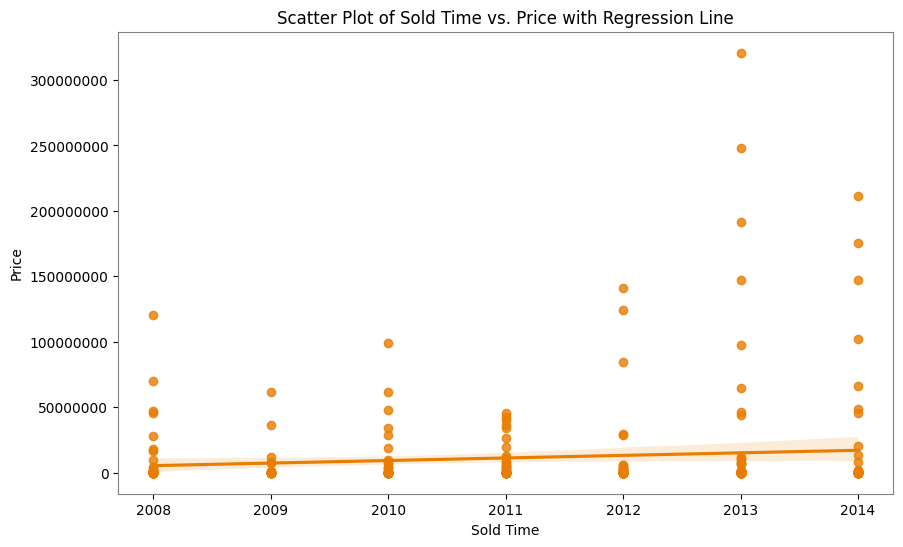

In [30]:
# Seeing sellings at time and price De Kooning

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_dk['soldtime'] = pd.to_numeric(final_auctions_dk['soldtime'], errors='coerce')
final_auctions_dk['price'] = pd.to_numeric(final_auctions_dk['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_dk = final_auctions_dk.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='soldtime', y='price', data=final_auctions_dk, color='#E97D01')

# Set the labels and title
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Sold Time')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Time vs. Price with Regression Line')

# Show the plot
plt.show()


Shown this way, it is difficult to understand the actual amount of values for each layer


In [31]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_dk['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
count_df_dk = final_auctions_dk.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
count_df_dk.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
count_df_dk.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
count_df_dk





,soldtime,rounded_prices,count
0,2008,0.0,41
1,2008,10000000.0,2
2,2008,20000000.0,1
3,2008,40000000.0,2
4,2008,70000000.0,1
5,2008,120000000.0,1
6,2009,0.0,14
7,2009,10000000.0,1
8,2009,30000000.0,1
9,2009,60000000.0,1


In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # Define the two colors
# color1 = '#FCAC23'  # Yellow
# color2 = '#B53302'  # Red


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])

# # Assuming count_df is your DataFrame


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_dk, legend=True, palette=cmap, sizes=(50,200))

# # Set the labels and title
# plt.xlabel('Sold Time')
# plt.ylabel('Rounded Price')
# plt.title('Bubble Chart of Sold Time vs. Rounded Price')

# # Show the plot
# plt.show()




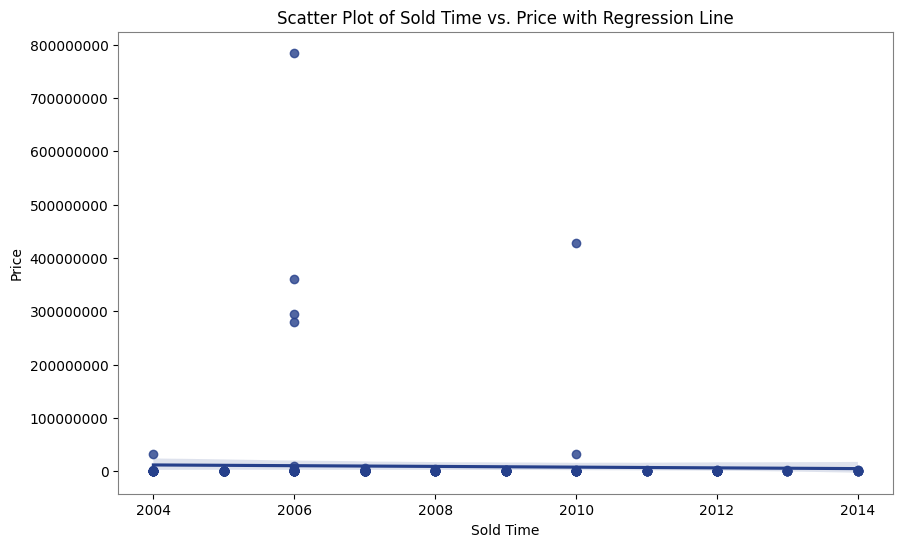

In [141]:
# Seeing sellings at time and price Klimt

# Convert 'soldtime' and 'price' columns to numeric data types if they are not already
final_auctions_k['soldtime'] = pd.to_numeric(final_auctions_k['soldtime'], errors='coerce')
final_auctions_k['price'] = pd.to_numeric(final_auctions_k['price'], errors='coerce')

# Drop rows with NaN values if any
final_auctions_dk = final_auctions_dk.dropna(subset=['soldtime', 'price'])

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='soldtime', y='price', data=final_auctions_k, color='#26408B')

# Set the labels and title
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Sold Time')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Time vs. Price with Regression Line')

# Show the plot
plt.show()



as for de Kooning, we now show de distribution of values to make more explicit the distribution.

In [143]:
# Round the 'price' values to the nearest million
rounded_prices = (final_auctions_k['price'] // 10000000) * 10000000

# Create a new DataFrame with 'soldtime', 'rounded_prices', and 'count'
count_df_k = final_auctions_k.groupby(['soldtime', rounded_prices]).size().reset_index(name='count')

# Rename columns
count_df_k.rename(columns={rounded_prices.name: 'rounded_prices'}, inplace=True)

# Sort the DataFrame by 'soldtime'
count_df_k.sort_values(by='soldtime', inplace=True)

# Display the new DataFrame
count_df_k





,soldtime,rounded_prices,count
0,2004,0.00,20
1,2004,30000000.00,1
2,2005,0.00,61
3,2006,0.00,27
4,2006,10000000.00,1
5,2006,280000000.00,1
6,2006,290000000.00,1
7,2006,360000000.00,1
8,2006,780000000.00,1
9,2007,0.00,51


In [35]:
# # Define the two colors
# color1 = '#81B1D5'  # Light blue
# color2 = '#0F084B'  # Dark blue


# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_k, legend=True, palette=cmap, sizes=(50,200))

# # Set the labels and title
# plt.xlabel('Sold Time')
# plt.ylabel('Rounded Price')
# plt.title('Bubble Chart of Sold Time vs. Rounded Price')

# # Show the plot
# plt.show()


In [36]:
# # Comparison scatterplot
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming new_dataframe_k and final_auctions_dk are your DataFrames containing 
# # Create a figure with two subplots
# fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# # Plot the first scatter plot with data from new_dataframe_k
# sns.scatterplot(x='soldtime', y='price', data=new_dataframe_k, ax=axs[0])
# axs[0].set_title('Scatter Plot of Sold Time vs. Price - K Data')
# axs[0].set_ylabel('Price')

# # Plot the second scatter plot with data from final_auctions_dk
# sns.scatterplot(x='soldtime', y='price', data=final_auctions_dk, ax=axs[1])
# axs[1].set_title('Scatter Plot of Sold Time vs. Price - DK Data')
# axs[1].set_xlabel('Sold Time')
# axs[1].set_ylabel('Price')

# # Match x-axis limits of the second subplot to the first subplot
# axs[1].set_xlim(axs[0].get_xlim())

# # Match y-axis limits of the second subplot to the first subplot
# axs[1].set_ylim(axs[0].get_ylim())

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()



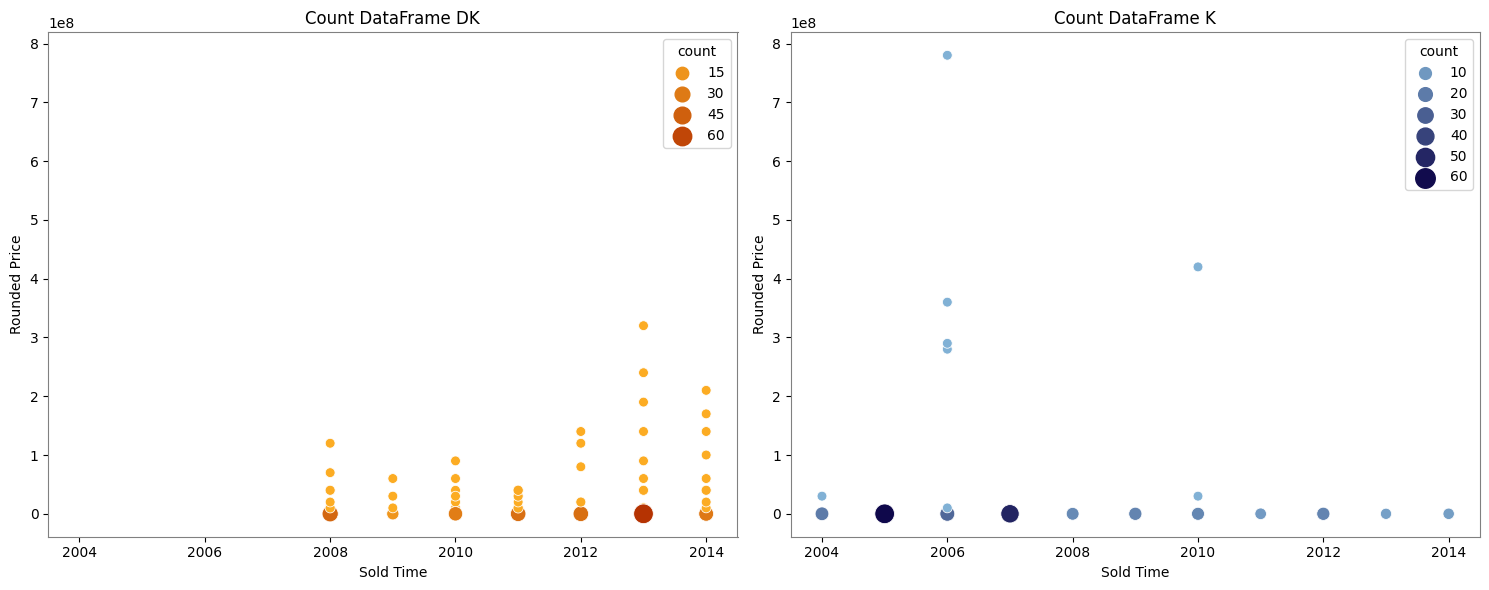

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the two colors
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red


# Create a custom colormap gradient
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])

# Define the two colors for the custom gradient
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create a custom colormap gradient
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for count_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200))
axs[0].set_title('Count DataFrame DK')
axs[0].set_xlabel('Sold Time')
axs[0].set_ylabel('Rounded Price')

# Plot for count_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200))
axs[1].set_title('Count DataFrame K')
axs[1].set_xlabel('Sold Time')
axs[1].set_ylabel('Rounded Price')

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



This analysis shows us that The the price for both Klimt and De Koning wors are pretty similar, and that interest in De Kooning is way higher

### Studying the median
The graph above makes clear that the outliers are many, moslty for klimt. so better using the median

In [38]:
#median price per year de Kooning
pd.options.display.float_format = '{:.2f}'.format


mean_price = final_auctions_dk['price'].mean()

print('overall median:', mean_price)


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()


# Assuming 'mean_price_per_year_dk' is the Series containing mean price per year
mean_price_per_year_dk_df = mean_price_per_year_dk.reset_index()

# Rename the columns
mean_price_per_year_dk_df.columns = ['soldtime', 'count']
# Print the mean price for each year
mean_price_per_year_dk_df

overall median: 12006123.876221498


,soldtime,count
0,2008,7798806.04
1,2009,7603057.65
2,2010,9788578.82
3,2011,7128407.11
4,2012,10849152.44
5,2013,15078419.76
6,2014,21186242.25


In [39]:
# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_dk.plot(kind='line', marker='o', color='#E97D01')
# plt.title('Mean Price Variation per Year')
# plt.xlabel('Year')
# plt.ylabel('Mean Price')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [144]:
#median price per year Klimt
pd.options.display.float_format = '{:.2f}'.format


mean_price = final_auctions_k['price'].median()

print('overall mean:', mean_price)


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].median()


# Print the mean price for each year
mean_price_per_year_k

overall mean: 289000.0


soldtime
2004   180210.00
2005   216270.00
2006   391455.00
2007   551400.00
2008   297770.00
2009   291190.00
2010   330920.00
2011   630620.00
2012   274550.00
2013   475000.00
2014   218885.00
Name: price, dtype: float64

In [41]:
# # Plot the variation of mean price per year
# plt.figure(figsize=(10, 6))
# mean_price_per_year_k.plot(kind='line', marker='o', color='#26408B')
# plt.title('Mean Price Variation per Year')
# plt.xlabel('Year')
# plt.ylabel('Mean Price')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

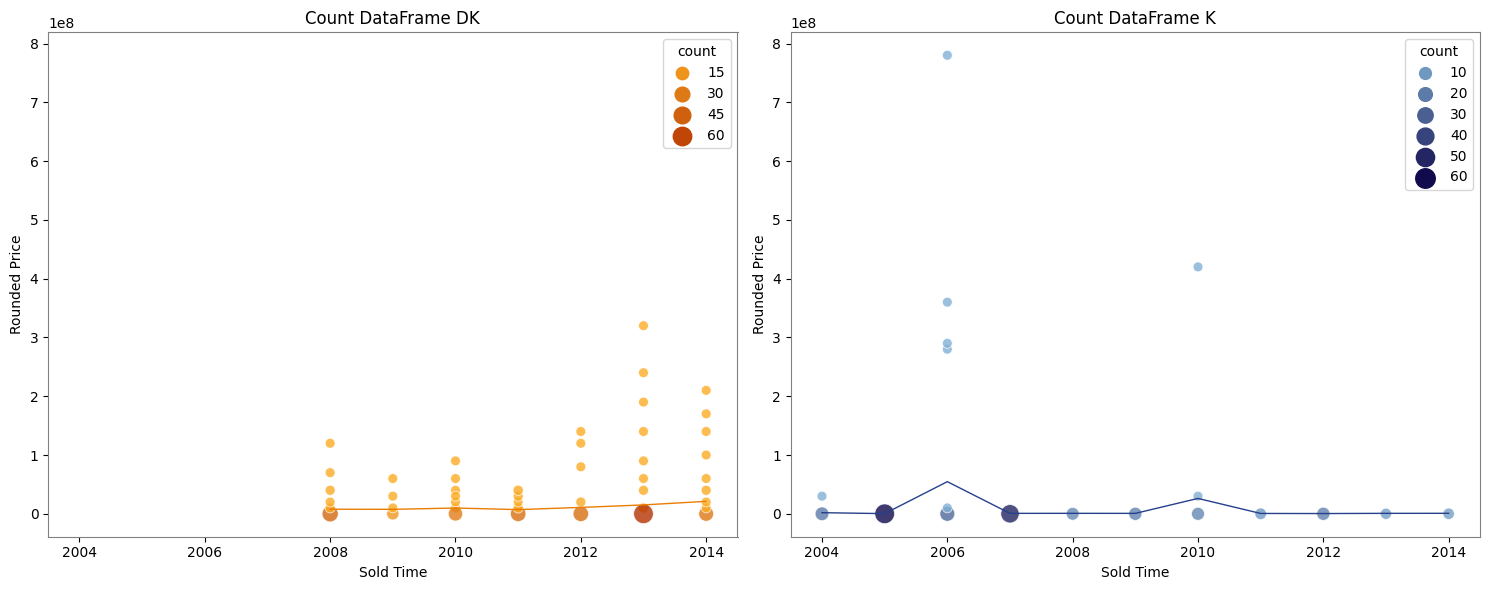

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the two colors for the custom gradient
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue

# Create custom colormaps
cmap_orange = LinearSegmentedColormap.from_list('custom_gradient_orange', [color1, color2])
cmap_blue = LinearSegmentedColormap.from_list('custom_gradient_blue', [color3, color4])

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for count_df_dk
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_dk, ax=axs[0], legend=True, palette=cmap_orange, sizes=(50,200), alpha=0.8)
axs[0].set_title('Count DataFrame DK')
axs[0].set_xlabel('Sold Time')
axs[0].set_ylabel('Rounded Price')

# Plot the line plot for mean price per year for final_auctions_dk
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].mean()
axs[0].plot(mean_price_per_year_dk.index, mean_price_per_year_dk.values, color='#E97D01', linestyle='-', linewidth=1)

# Plot for count_df_k
sns.scatterplot(x='soldtime', y='rounded_prices', size='count', hue='count', data=count_df_k, ax=axs[1], legend=True, palette=cmap_blue, sizes=(50,200), alpha=0.8)
axs[1].set_title('Count DataFrame K')
axs[1].set_xlabel('Sold Time')
axs[1].set_ylabel('Rounded Price')

# Plot the line plot for mean price per year for new_dataframe_k
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].mean()
axs[1].plot(mean_price_per_year_k.index, mean_price_per_year_k.values, color='#26408B', linestyle='-', linewidth=1)

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [261]:
count_df_dk.to_csv('../docs/data/rounded_count_dk.csv', index=False)
mean_price_per_year_dk.to_csv('../docs/data/mean_price_per_year_dk.csv', index=False)
count_df_k.to_csv('../docs/data/rounded_count_k.csv', index=False)
mean_price_per_year_k.to_csv('../docs/data/mean_price_per_year_k.csv', index=False)

#### Mean of sellings per year

qui mostro il numero di vendite per anno e la media di prezzo (la dimensione della palla). Dici che sarebbe meglio fare i guadagni totali?

In [43]:
pd.options.display.float_format = '{:.2f}'.format


mean_price = final_auctions_dk['price'].mean()

print('overall mean:', mean_price)


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_dk = final_auctions_dk.groupby('soldtime')['price'].median()


# Print the mean price for each year
mean_price_per_year_dk

overall mean: 12006123.876221498


soldtime
2008   193750.00
2009   625000.00
2010   422750.00
2011   230000.00
2012   175000.00
2013    84000.00
2014   143750.00
Name: price, dtype: float64

In [44]:
import pandas as pd

# Assuming final_auctions_dk is your DataFrame with columns 'soldtime' and 'price'

# Group by 'soldtime' and calculate count and mean
grouped_data_dk = final_auctions_dk.groupby('soldtime')['price'].agg(['mean', 'count'])

# Reset index to flatten the hierarchical index
grouped_data_dk.reset_index(inplace=True)

# Rename the columns as desired
grouped_data_dk.columns = ['soldtime', 'mean', 'count']

grouped_data_dk

,soldtime,mean,count
0,2008,7798806.04,48
1,2009,7603057.65,17
2,2010,9788578.82,34
3,2011,7128407.11,45
4,2012,10849152.44,41
5,2013,15078419.76,82
6,2014,21186242.25,40


In [45]:

# # Define the two colors
# color1 = '#FCAC23'  # Yellow
# color2 = '#B53302'  # Red

# # Create a custom colormap gradient
# cmap = LinearSegmentedColormap.from_list('custom_gradient', [color1, color2])


# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# # use the scatterplot function to build the bubble map
# sns.scatterplot(data=grouped_data_dk, x="soldtime", y="count", size="mean", hue='mean', legend=True, sizes=(50, 200), palette=cmap)

# # show the graph
# plt.show()

In [147]:
pd.options.display.float_format = '{:.2f}'.format


mean_price = final_auctions_k['price'].mean()

print('overall mean:', mean_price)


# Calculate the mean price for each value of 'soldtime'
mean_price_per_year_k = final_auctions_k.groupby('soldtime')['price'].mean()


# Print the mean price for each year
mean_price_per_year_k

overall mean: 9225509.9609375


soldtime
2004    1895017.14
2005     282144.59
2006   54654695.31
2007     726252.35
2008     795700.67
2009     706580.00
2010   26130432.22
2011     584293.33
2012     422732.94
2013     759401.43
2014     834898.75
Name: price, dtype: float64

In [148]:
import pandas as pd

# Assuming new_dataframe_dk is your DataFrame with columns 'soldtime' and 'price'

# Group by 'soldtime' and calculate count and mean
grouped_data_k = final_auctions_k.groupby('soldtime')['price'].agg(['mean', 'count'])

# Reset index to flatten the hierarchical index
grouped_data_k.reset_index(inplace=True)

# Rename the columns as desired
grouped_data_k.columns = ['soldtime', 'mean', 'count']

grouped_data_k

,soldtime,mean,count
0,2004,1895017.14,21
1,2005,282144.59,61
2,2006,54654695.31,32
3,2007,726252.35,51
4,2008,795700.67,15
5,2009,706580.00,17
6,2010,26130432.22,18
7,2011,584293.33,9
8,2012,422732.94,17
9,2013,759401.43,7


In [48]:
# color3 = '#81B1D5'  # Light blue
# color4 = '#0F084B'  # Dark blue

# cmap_blue = LinearSegmentedColormap.from_list('custom_gradient_blue', [color3, color4])



# # Create the bubble chart with color gradient based on 'count'
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# # use the scatterplot function to build the bubble map
# sns.scatterplot(data=grouped_data_k, x="soldtime", y="count", size="mean", hue='mean', legend=True, sizes=(50, 200), palette=cmap_blue)

# # show the graph
# plt.show()

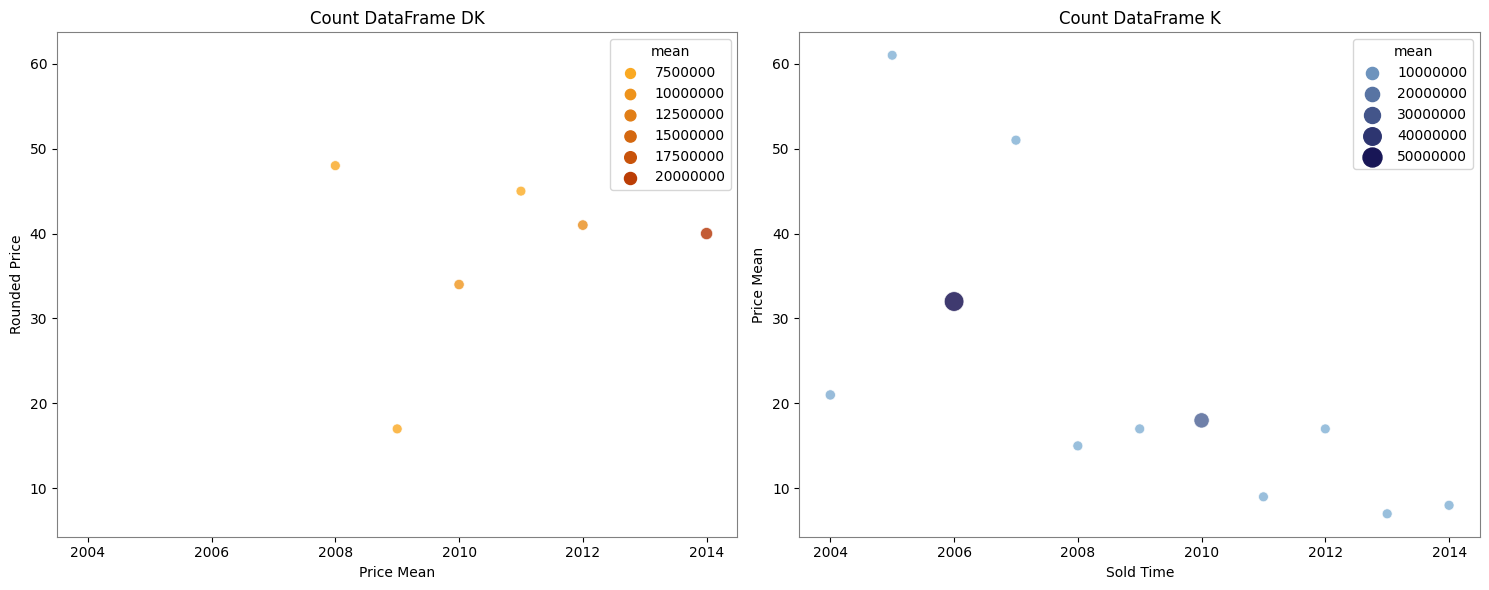

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two colors for the custom gradient
color1 = '#FCAC23'  # Yellow
color2 = '#B53302'  # Red
color3 = '#81B1D5'  # Light blue
color4 = '#0F084B'  # Dark blue


cmap_orange = LinearSegmentedColormap.from_list('custom_gradient_blue', [color1, color2])


cmap_blue = LinearSegmentedColormap.from_list('custom_gradient_blue', [color3, color4])

# Determine the maximum size value from both DataFrames
max_size = grouped_data_dk['mean'].max() * 200 / grouped_data_k['mean'].max()


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for grouped_data_dk
sns.scatterplot(data=grouped_data_dk, x="soldtime", y="count", size="mean", sizes=(50, max_size), hue='mean', ax=axs[0], legend='brief', palette=cmap_orange, alpha=0.8)
axs[0].set_title('Count DataFrame DK')
axs[0].set_xlabel('Price Mean')
axs[0].set_ylabel('Rounded Price')

# Plot for grouped_data_k
sns.scatterplot(data=grouped_data_k, x="soldtime", y="count", size="mean", sizes=(50, 200), hue='mean', ax=axs[1], legend='brief', palette=cmap_blue, alpha=0.8)
axs[1].set_title('Count DataFrame K')
axs[1].set_xlabel('Sold Time')
axs[1].set_ylabel('Price Mean')

# Match x-axis limits of the second subplot to the first subplot
axs[0].set_xlim(axs[1].get_xlim())

# Match y-axis limits of the second subplot to the first subplot
axs[0].set_ylim(axs[1].get_ylim())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# 2. Bibliography

webscraping collections data and general bibliography


### query on data.bnf De Kooning

it's not possible to do a query directly using python, so this query was performed here <a href="https://data.bnf.fr/sparql/">data.bnf</a>:
```
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn;
        
  FILTER (bif:contains(?title, "De_Kooning"))}

```

has been done on the web endpoint and then the CSV was downloaded, this query searches data both in bnf catalogue and bnf.data.


```
PREFIX rdarelationships: <http://rdvocab.info/RDARelationshipsWEMI/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT distinct ?work ?title ?creatorname ?date ?isbn
WHERE {
  ?work dct:title ?title;
        dct:creator ?creator.
		?creator foaf:name ?creatorname.
  ?work dct:date ?date.
  ?work rdarelationships:expressionOfWork ?expression.
?manifestation rdarelationships:expressionManifested ?expression.
?manifestation bnf-onto:isbn ?isbn.  
  FILTER (bif:contains(?title, "De_Kooning"))}
```

questa query ritorna anche l'autore, assieme ad ISBN, il problema è che i risultati tra la prima e la seconda query non corrispondono. Penso perchè si lavora a livello di expression (?)

In [50]:
import pandas as pd
bnf_dk = pd.read_csv("databnf_DK.csv")
pd.set_option('display.max_rows', None)
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,978-2-9557550-6-8
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


In [51]:
liss = []
for column_name in bnf_dk.columns:
    if column_name == "title":
        for value in bnf_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))

row_count = bnf_dk.shape[0]

70


In [52]:
for column_name in bnf_dk.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_dk[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_dk.at[i, column_name] = value.replace("-", "")
bnf_dk.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45692271m#about,Le rire de De Kooning,"Bordeaux : Olympique , 2019",2019,https://catalogue.bnf.fr/ark:/12148/cb45692271m,9782955755068
1,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714845817
2,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160
3,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714845814
4,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,9780714873169


### query on google books api - De Kooning

In [53]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_dk = fetch_books("De Kooning")

# Saving JSON data to a file
with open("dkbooks.json", "w") as json_file:
    json.dump(books_dk, json_file, indent=4)

print("JSON data saved to dkbooks.json")

JSON data saved to dkbooks.json


In [54]:
import json

# Load JSON data from file
with open("dkbooks.json", "r") as json_file:
    books_data_dk = json.load(json_file)

# Extract relevant fields from each book item
books_list_dk = []
for book in books_data_dk:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_dk.append(book_info)

# Create DataFrame
books_df_dk = pd.DataFrame(books_list_dk)

# Display DataFrame
books_df_dk.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",N/A,Willem De Kooning,N/A,1985,UOM:39015015825683
1,De Kooning,N/A,N/A,N/A,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,N/A,"Willem De Kooning, Gabriella Drudi",N/A,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [55]:
liss = []
for column_name in books_df_dk.columns:
    if column_name == "Title":
        for value in books_df_dk[column_name]:
            if "de Kooning" in value or "De Kooning" in value:
                liss.append(value)
print(len(liss))


147


In [56]:
# Assuming books_df is your DataFrame
new_dataframe_dk = books_df_dk[books_df_dk["Title"].str.contains("de Kooning", case=False) & ~books_df_dk["Title"].str.contains("Elaine de Kooning", case=False)].copy()

new_dataframe_dk.reset_index(drop=True, inplace=True)

new_dataframe_dk.head()
# questo df ha  5 in meno del numero riportato sopra. Come mai?

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,"De Kooning, dipinti, disegni, sculture",N/A,Willem De Kooning,N/A,1985,UOM:39015015825683
1,De Kooning,N/A,N/A,N/A,1985,OCLC:12250843
2,Willem De Kooning,late paintings,"Willem De Kooning, Museo Carlo Bilotti",Mondadori Electa,2006,UOM:39015066851935
3,De Kooning,N/A,"Willem De Kooning, Gabriella Drudi",N/A,1972,UOM:39015045652768
4,De Kooning,A Retrospective,"Willem De Kooning, John Elderfield, Lauren Mah...",The Museum of Modern Art,2011,9780870707971


In [57]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_dk= pd.merge(bnf_dk, new_dataframe_dk, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_dk


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45292173b#about,A way of living : the art of Willem De Kooning,"London : Phaidon Press Limited , 2017",2014,https://catalogue.bnf.fr/ark:/12148/cb45292173b,0714873160,Willem de Kooning,A Way of Living,Judith Zilczer,Phaidon Press,2017-05-22
1,http://data.bnf.fr/ark:/12148/cb347640459#about,Willem De Kooning : Whitney museum of American...,"Paris : Centre Georges-Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347640459,2858502552,De Kooning,,"Claire Stoullig, Catherine Bompuis, Akademie d...",N/A,1984
2,http://data.bnf.fr/ark:/12148/cb37526494b#about,"Willem de Kooning : drawings, paintings, sculp...",New York : Whitney museum of American art ; Mu...,1983,https://catalogue.bnf.fr/ark:/12148/cb37526494b,0393018407,Willem de Kooning,"Drawings, Paintings, Sculpture, [mostra Itiner...","Paul Cummings, Willem De Kooning",N/A,1983
3,http://data.bnf.fr/ark:/12148/cb45288067c#about,"Willem De Kooning, Zao Wou-Ki : [exposition Lé...",New York : Lévy Gorvy,2017,https://catalogue.bnf.fr/ark:/12148/cb45288067c,1944379126,De Kooning - Zao Wou-KI,N/A,N/A,Dominique Levy Gallery,2017-03-28
4,http://data.bnf.fr/ark:/12148/cb42265321b#about,Willem de Kooning : the artist's materials,"Los Angeles : Getty conservation institute , c...",2010,https://catalogue.bnf.fr/ark:/12148/cb42265321b,9781606060216,Willem de Kooning,The Artist's Materials,Susan Lake,Getty Publications,2010
5,http://data.bnf.fr/ark:/12148/cb34982520m#about,"Willem de Kooning, recent paintings, 1983-1986...","London : Anthony d'Offay gallery , 1986",1986,https://catalogue.bnf.fr/ark:/12148/cb34982520m,094756408X,Willem de Kooning,"Recent Paintings, 1983-1986",Willem De Kooning,Anthony D'Offay Gallery,1986-01-01
6,http://data.bnf.fr/ark:/12148/cb347686735#about,"De Kooning : petit journal de l'exposition, 28...","Paris : Centre Georges Pompidou , 1984",1984,https://catalogue.bnf.fr/ark:/12148/cb347686735,285850234X,De Kooning,petit journal de l'exposition : Musee national...,"Musée national d'art moderne (Paris), Whitney ...",N/A,1984
7,http://data.bnf.fr/ark:/12148/cb38841654h#about,"Willem de Kooning : tracing the figure, [exhib...",Los Angeles : Museum of contemporary art ; Pri...,2002,https://catalogue.bnf.fr/ark:/12148/cb38841654h,069109618X,Willem de Kooning,Tracing the Figure,"Willem De Kooning, Cornelia H. Butler, Paul Sc...",Princeton University Press,2002
8,http://data.bnf.fr/ark:/12148/cb356992193#about,Willem De Kooning,"Paris : l'Échoppe , 1994",1994,https://catalogue.bnf.fr/ark:/12148/cb356992193,2840680297,Willem De Kooning,N/A,Edwin Denby,N/A,1994


In [58]:
# Assuming df1 and df2 are your two DataFrames

# Rename the 'Title' column in df2 to 'title'
new_dataframe_dk.rename(columns={'Title': 'title'}, inplace=True)
new_dataframe_dk.rename(columns={'PublishedDate': 'date'}, inplace=True)
new_dataframe_dk.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df_dk = pd.concat([bnf_dk, new_dataframe_dk], ignore_index=True)

# Drop duplicates based on 'isbn' column
new_df_dk = combined_df_dk.drop_duplicates(subset='isbn')
new_df_dk = combined_df_dk.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
new_df_dk.reset_index(drop=True, inplace=True)
new_df_dk.drop(columns=['work', 'uri'], inplace=True)
index_column = new_df_dk.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(new_df_dk.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
new_df_dk = new_df_dk[new_column_order]

for i, date_value in enumerate(new_df_dk['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    # Update the 'date' column with the list of components
    new_df_dk.at[i, 'date'] = date_components


# Display the new DataFrame with unique rows based on ISBN and consistent column name 'title'

new_df_dk.to_csv('bibliographic_data_DK.csv', index=False)
new_df_dk.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_27036\2776136470.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_dk.drop(columns=['work', 'uri'], inplace=True)


,title,Subtitle,publisher,date,isbn,Authors
0,Le rire de De Kooning,NaN,"Bordeaux : Olympique , 2019",2019,9782955755068,NaN
1,A way of living : the art of Willem De Kooning,NaN,"London : Phaidon Press Limited , 2017",2014,0714845817,NaN
2,"Hartung et les peintres lyriques : Schneider, ...",NaN,Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
3,Willem de Kooning : drawing seeing-seeing draw...,NaN,"New York : Arena , 1998",1998,0965728080,NaN
4,"Les irascibles : Pollock, De Kooning, Rothko e...",NaN,"Paris : le Cherche midi , DL 2023",2023,9782749176703,NaN


webscraping collections data and general bibliography


# query on data.bnf - Klimt

it's not possible to do a query directly using python, so this query:
```PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX bnf-onto: <http://data.bnf.fr/ontology/bnf-onto/>
SELECT * 
WHERE {
  ?work dct:title ?title ;
        dct:publisher ?publisher;
        dct:date ?date;
        rdfs:seeAlso ?uri ;
        bnf-onto:isbn ?isbn
  FILTER (bif:contains(?title, "Klimt"))}```

has been done on the web endpoint and then the CSV was downloaded. 

In [59]:
bnf_k = pd.read_csv("databnf_KLI.csv")
pd.set_option('display.max_rows', None)
bnf_k.head()


,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0-7148-1600-0
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0-7148-1600-0
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0-7148-2967-6


In [60]:
for column_name in bnf_k.columns:
    if column_name == "isbn":
        for i, value in enumerate(bnf_k[column_name]):
            if "-" in value:
                # Replacing hyphens with empty string
                bnf_k.at[i, column_name] = value.replace("-", "")
bnf_k.head()

,work,title,publisher,date,uri,isbn
0,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,0878468528
1,http://data.bnf.fr/ark:/12148/cb45532401k#about,Klimt and Schiele : drawings from the Albertin...,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,https://catalogue.bnf.fr/ark:/12148/cb45532401k,9780878468522
2,http://data.bnf.fr/ark:/12148/cb35356100b#about,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...","London : Phaidon , 1975",1975,https://catalogue.bnf.fr/ark:/12148/cb35356100b,0714816000
3,http://data.bnf.fr/ark:/12148/cb37494522j#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 1993",1993,https://catalogue.bnf.fr/ark:/12148/cb37494522j,0714816000
4,http://data.bnf.fr/ark:/12148/cb39124684p#about,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...","London : Phaidon , 2001",2001,https://catalogue.bnf.fr/ark:/12148/cb39124684p,0714829676


## query on google books api - Klimt

In [61]:
import requests
import json

def fetch_books(query, max_results=40):
    base_url = "https://www.googleapis.com/books/v1/volumes"
    start_index = 0
    all_results = []

    while True:
        params = {
            "q": query,
            "startIndex": start_index,
            "maxResults": max_results
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if not items:
                break
            all_results.extend(items)
            start_index += max_results
        else:
            print("Failed to retrieve data. Status code:", response.status_code)
            break

    return all_results

books_k = fetch_books("Klimt")

# Saving JSON data to a file
with open("klimt_books.json", "w") as json_file:
    json.dump(books_k, json_file, indent=4)

print("JSON data saved to klimt_books.json")

JSON data saved to klimt_books.json


In [62]:
import json

# Load JSON data from file
with open("klimt_books.json", "r") as json_file:
    books_data_k = json.load(json_file)

# Extract relevant fields from each book item
books_list_k = []
for book in books_data_k:
    book_info = {
        "Title": book["volumeInfo"].get("title", "N/A"),
        "Subtitle": book["volumeInfo"].get("subtitle", "N/A"),
        "Authors": ", ".join(book["volumeInfo"].get("authors", ["N/A"])),
        "Publisher": book["volumeInfo"].get("publisher", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "isbn": book["volumeInfo"].get("industryIdentifiers", [{}])[0].get("identifier", "N/A"),  # Retrieving ISBN
    }
    books_list_k.append(book_info)

# Create DataFrame
books_df_k = pd.DataFrame(books_list_k)

# Display DataFrame
books_df_k.head()

,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,N/A,N/A,2021,8857246574
1,Gustav Klimt,N/A,Gustav Klimt,N/A,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,N/A,Tobias G. Natter,N/A,2018,383656291X
3,Klimt,N/A,"Gustav Klimt, Cecilia Bernardini",N/A,1980,UCSC:32106008329085
4,L'opera completa di Klimt,N/A,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",N/A,1978,PSU:000032538878


In [63]:
liss = []
for column_name in books_df_k.columns:
    if column_name == "Title":
        for value in books_df_k[column_name]:
            if "Klimt" in value or "Klimt" in value:
                liss.append(value)
print(len(liss))

208


In [64]:
import pandas as pd

# Assuming books_df is your DataFrame
# Assuming books_df is your DataFrame
new_dataframe_k = books_df_k[books_df_k["Title"].str.contains("Klimt", case=False)]

new_dataframe_k.reset_index(drop=True, inplace=True)

new_dataframe_k.head()


,Title,Subtitle,Authors,Publisher,PublishedDate,isbn
0,Klimt,la secessione e l'Italia,N/A,N/A,2021,8857246574
1,Gustav Klimt,N/A,Gustav Klimt,N/A,1981,8820204649
2,Gustav Klimt. Tutti i dipinti,N/A,Tobias G. Natter,N/A,2018,383656291X
3,Klimt,N/A,"Gustav Klimt, Cecilia Bernardini",N/A,1980,UCSC:32106008329085
4,L'opera completa di Klimt,N/A,"Gustav Klimt, Johannes Dobai, Sergio Coradeschi",N/A,1978,PSU:000032538878


In [65]:
# Merge the two DataFrames on the 'ISBN' column
df_combined_k= pd.merge(bnf_k, new_dataframe_k, on='isbn', how='inner')

# Display the new DataFrame with rows where ISBN is found in both DataFrames
df_combined_k


,work,title,publisher,date,uri,isbn,Title,Subtitle,Authors,Publisher,PublishedDate
0,http://data.bnf.fr/ark:/12148/cb45640630m#about,Klimt lost,Wien : Czernin Verlag,2018,https://catalogue.bnf.fr/ark:/12148/cb45640630m,3707606414,Klimt Lost,Reihe Klimt Villa,"Niko Wahl, Marion Krammer",N/A,2018-04-25
1,http://data.bnf.fr/ark:/12148/cb46858502q#about,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,https://catalogue.bnf.fr/ark:/12148/cb46858502q,9791259580344,Klimt e i maestri «segreti» della Ricci Oddi. ...,N/A,E. Pontiggia,N/A,2021
2,http://data.bnf.fr/ark:/12148/cb46855667v#about,"Klimt : la secessione e l'Italia, [mostra al P...","Milano : Skira , 2021",2021,https://catalogue.bnf.fr/ark:/12148/cb46855667v,8857246574,Klimt,la secessione e l'Italia,N/A,N/A,2021
3,http://data.bnf.fr/ark:/12148/cb43818271g#about,"Klimt : alle origini di un mito, [mostra, Mila...","Milano : 24 ore cultura , impr. 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43818271g,8866481939,Klimt,alle origini di un mito,Alfred Weidinger,24 Ore Cultura,2014
4,http://data.bnf.fr/ark:/12148/cb442786023#about,"Klimt : up close and personal, paintings, lett...","Wien : Brandstätter , cop. 2012",2012,https://catalogue.bnf.fr/ark:/12148/cb442786023,3850336298,Klimt,"Up Close and Personal : Paintings, Letters, In...","Gustav Klimt, Tobias Günter Natter, Franz Smol...",Christian Brandstatter,2012
5,http://data.bnf.fr/ark:/12148/cb43812128m#about,"L'ossessione nordica : Böcklin, Klimt, Munch ...","Venezia : Marsilio , 2014",2014,https://catalogue.bnf.fr/ark:/12148/cb43812128m,8831717847,"L'ossessione nordica. Klimt, Böcklin, Munch e ...",N/A,"Giandomenico Romanelli, A. Tiddia",N/A,2014
6,http://data.bnf.fr/ark:/12148/cb472430726#about,"Klimt e l'arte italiana : [mostra, Museo d'art...","Cinisello Balsamo, Milano : Silvana editoriale",2023,https://catalogue.bnf.fr/ark:/12148/cb472430726,8836654703,Klimt e l'arte italiana. Ediz. illustrata,N/A,"Beatrice Avanzi, V. Sgarbi",N/A,2023
7,http://data.bnf.fr/ark:/12148/cb40941041p#about,"Schiele, Klimt, Kokoschka e gli amici viennesi...","Milano : Skira ; Trento : MART, Museo di arte ...",2006,https://catalogue.bnf.fr/ark:/12148/cb40941041p,8876249508,"Schiele, Klimt, Kokoschka e gli amici viennesi...",N/A,"Tobias Günter Natter, Tomas Sharman, Thomas Tr...",N/A,2006


In [66]:
# Assuming df1 and df2 are your two DataFrames

# Rename the 'Title' column in df2 to 'title'
new_dataframe_k.rename(columns={'Title': 'title'}, inplace=True)
new_dataframe_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
new_dataframe_k.rename(columns={'Publisher': 'publisher'}, inplace=True)
# Concatenate the DataFrames vertically
combined_df_k = pd.concat([bnf_k, new_dataframe_k], ignore_index=True)

# Drop duplicates based on 'isbn' column
new_df_k = combined_df_k.drop_duplicates(subset='isbn')
new_df_k = combined_df_k.drop_duplicates(subset=['title', 'publisher', 'date'], keep='first')
# Reset index of the new DataFrame
new_df_k.reset_index(drop=True, inplace=True)
new_df_k.drop(columns=['work', 'uri'], inplace=True)
index_column = new_df_k.columns.get_loc('Subtitle')

# Move the column to position 2
new_column_order = list(new_df_k.columns)
new_column_order.insert(1, new_column_order.pop(index_column))
new_df_k = new_df_k[new_column_order]

for i, date_value in enumerate(new_df_k['date']):
    # Convert integer to string before splitting
    date_str = str(date_value)
    # Split the date string by '-'
    date_components = date_str.split('-')[0]
    # Update the 'date' column with the list of components
    new_df_k.at[i, 'date'] = date_components


# Display the new DataFrame with unique rows based on ISBN and consistent column name 'title'

new_df_k.to_csv('bibliographic_data_DK.csv', index=False)
new_df_k.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_27036\1732928187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe_k.rename(columns={'Title': 'title'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\1732928187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe_k.rename(columns={'PublishedDate': 'date'}, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\1732928187.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,title,Subtitle,publisher,date,isbn,Authors
0,Klimt and Schiele : drawings from the Albertin...,NaN,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN
1,"Art in Vienna, 1898-1918 : Klimt, Kokoschka, S...",NaN,"London : Phaidon , 1975",1975,0714816000,NaN
2,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...",NaN,"London : Phaidon , 1993",1993,0714816000,NaN
3,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...",NaN,"London : Phaidon , 2001",2001,0714829676,NaN
4,"Art in Vienna 1898-1918 : Klimt, Kokoschka, Sc...",NaN,"London : Phaidon , 2015",2015,0714868787,NaN


### Bibliography visualization


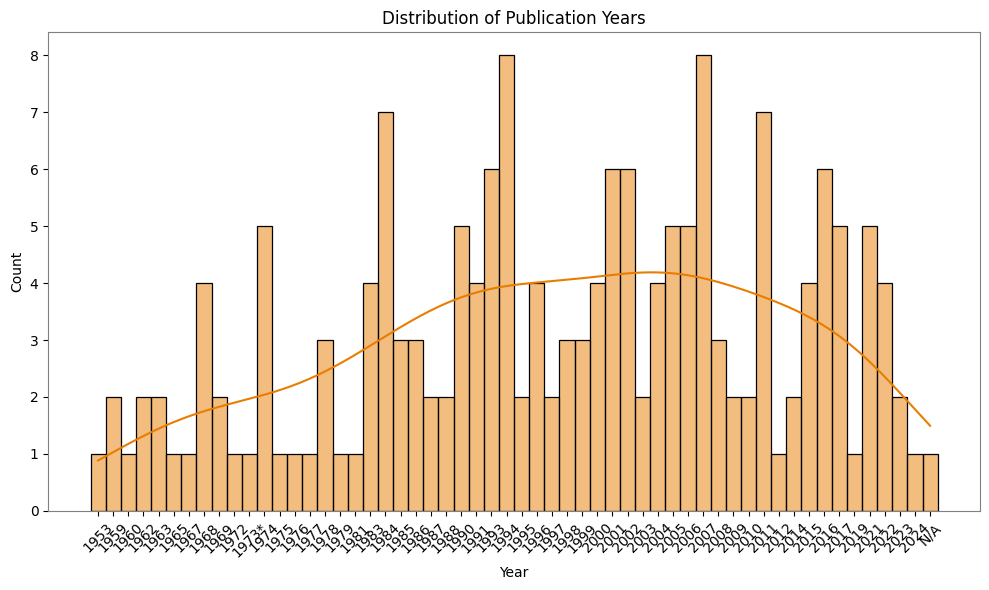

In [152]:
new_df_dk = new_df_dk.sort_values(by="date")

plt.figure(figsize=(10, 6))
sns.histplot(data=new_df_dk, x="date", color='#E97D01',  kde=True)
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

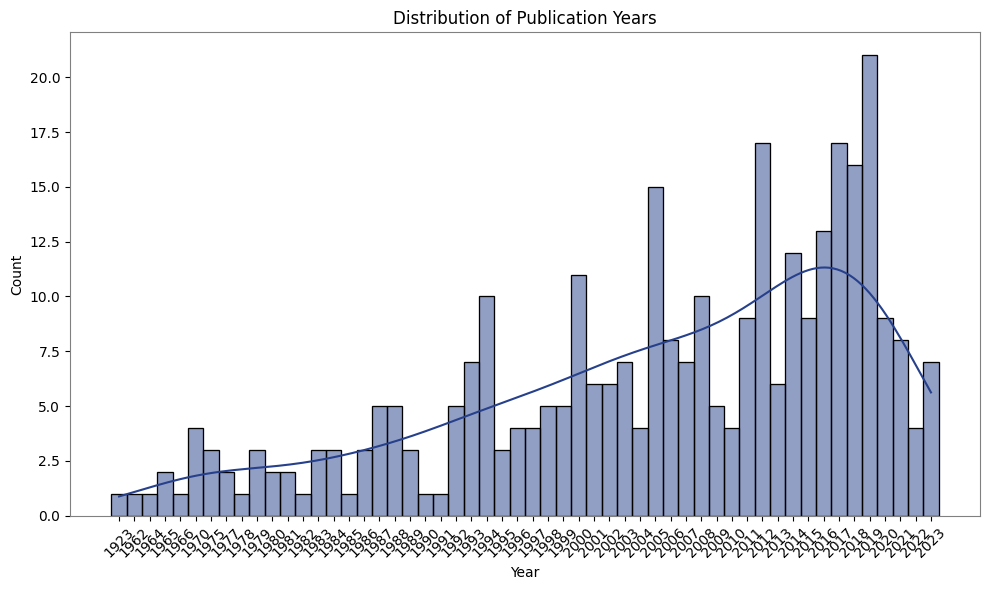

In [153]:
new_df_k = new_df_k.sort_values(by="date")

plt.figure(figsize=(10, 6))
sns.histplot(data=new_df_k, x="date", color='#26408B',  kde=True)
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### comparison

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


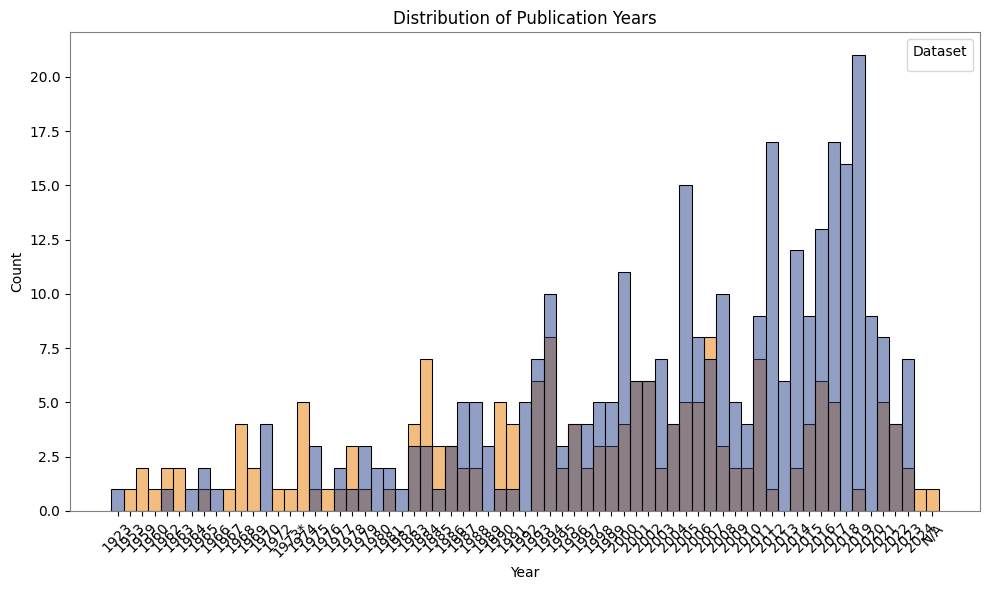

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the dataframes and add a 'category' column to differentiate between them
new_df_k['category'] = 'K'
new_df_dk['category'] = 'DK'
combined_df = pd.concat([new_df_k, new_df_dk])

# Sort the combined dataframe by date
combined_df = combined_df.sort_values(by="date")

# Plot the combined histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="date", hue="category", palette={'K': '#26408B', 'DK': '#E97D01'})
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.legend(title='Dataset')
plt.show()


In [155]:
new_df_dk.to_csv('../docs/data/de_kooning_publication_per_year.csv')
combined_df.to_csv('../docs/data/comparison_publication_per_year.csv')


In [70]:
# count publishers - De Kooning


# Assuming 'publisher' is the column name and new_df_k is your DataFrame
publisher_counts_dk = new_df_dk['publisher'].replace('N/A', 'Unknown').value_counts()
publisher_df_dk = pd.DataFrame({'publisher': publisher_counts_dk.index, 'count': publisher_counts_dk.values})
publisher_df_dk.head()


,publisher,count
0,Unknown,83
1,Rizzoli International Publications,3
2,Australian Geographic,2
3,The Museum of Modern Art,2
4,Mondadori Electa,1


In [71]:
# count authors - De Kooning


# Assuming 'publisher' is the column name and new_df_k is your DataFrame
authors_counts_dk = new_df_dk['Authors'].replace('N/A', 'Unknown').value_counts()
authors_df_dk = pd.DataFrame({'authors': authors_counts_dk.index, 'count': authors_counts_dk.values})
authors_df_dk.head()

,authors,count
0,Unknown,20
1,Willem De Kooning,16
2,Thomas B. Hess,3
3,"Mark Stevens, Annalyn Swan",2
4,Sally Yard,2


In [72]:
# count publishers - Klimt


# Assuming 'publisher' is the column name and new_df_k is your DataFrame
publisher_counts_k = new_df_k['publisher'].replace('N/A', 'Unknown').value_counts()
publisher_df_k = pd.DataFrame({'publisher': publisher_counts_k.index, 'count': publisher_counts_k.values})
publisher_df_k.head()


,publisher,count
0,Unknown,113
1,Prestel Publishing,9
2,Parkstone International,6
3,Flame Tree Gift,6
4,National Geographic Books,4


In [73]:
# count authors - Klimt


# Assuming 'publisher' is the column name and new_df_k is your DataFrame
authors_counts_k = new_df_k['Authors'].replace('N/A', 'Unknown').value_counts()
authors_df_k = pd.DataFrame({'authors': authors_counts_k.index, 'count': authors_counts_k.values})
authors_df_k.head()


,authors,count
0,Gustav Klimt,13
1,Unknown,10
2,Twisted City Gustav Klimt Gifts,6
3,Flame Tree Studio,6
4,Eva Di Stefano,6


In [74]:
# #plot top 5 authors - De Kooning
# # Assuming you have already created publisher_df DataFrame
# top_authors_dk = authors_df_dk.head(5)

# plt.figure(figsize=(10, 6))
# plt.bar(top_authors_dk['authors'], top_authors_dk['count'], color='#26408B')
# plt.xlabel('Publisher')
# plt.ylabel('Count')
# plt.title('Top 5 Publishers')
# plt.xticks(rotation=45)
# plt.show()

In [75]:
# #plot top 5 publishers- Klimt
# # Assuming you have already created publisher_df DataFrame
# top_publishers_k = publisher_df_kk.head(5)

# plt.figure(figsize=(10, 6))
# plt.bar(top_publishers['publisher'], top_publishers['count'], color='#3D60A7')
# plt.xlabel('Publisher')
# plt.ylabel('Count')
# plt.title('Top 5 Publishers')
# plt.xticks(rotation=45)
# plt.show()

In [76]:
# #plot top 5 authors - Klimt
# # Assuming you have already created publisher_df DataFrame
# top_authors_k = authors_df_k.head(5)

# plt.figure(figsize=(10, 6))
# plt.bar(top_authors_k['authors'], top_authors_k['count'], color='#26408B')
# plt.xlabel('Publisher')
# plt.ylabel('Count')
# plt.title('Top 5 Publishers')
# plt.xticks(rotation=45)
# plt.show()

In [77]:
# #plot top 5 publishers- Klimt
# # Assuming you have already created publisher_df DataFrame
# top_publishers_k = publisher_df_k.head(5)

# plt.figure(figsize=(10, 6))
# plt.bar(top_publishers['publisher'], top_publishers['count'], color='#3D60A7')
# plt.xlabel('Publisher')
# plt.ylabel('Count')
# plt.title('Top 5 Publishers')
# plt.xticks(rotation=45)
# plt.show()


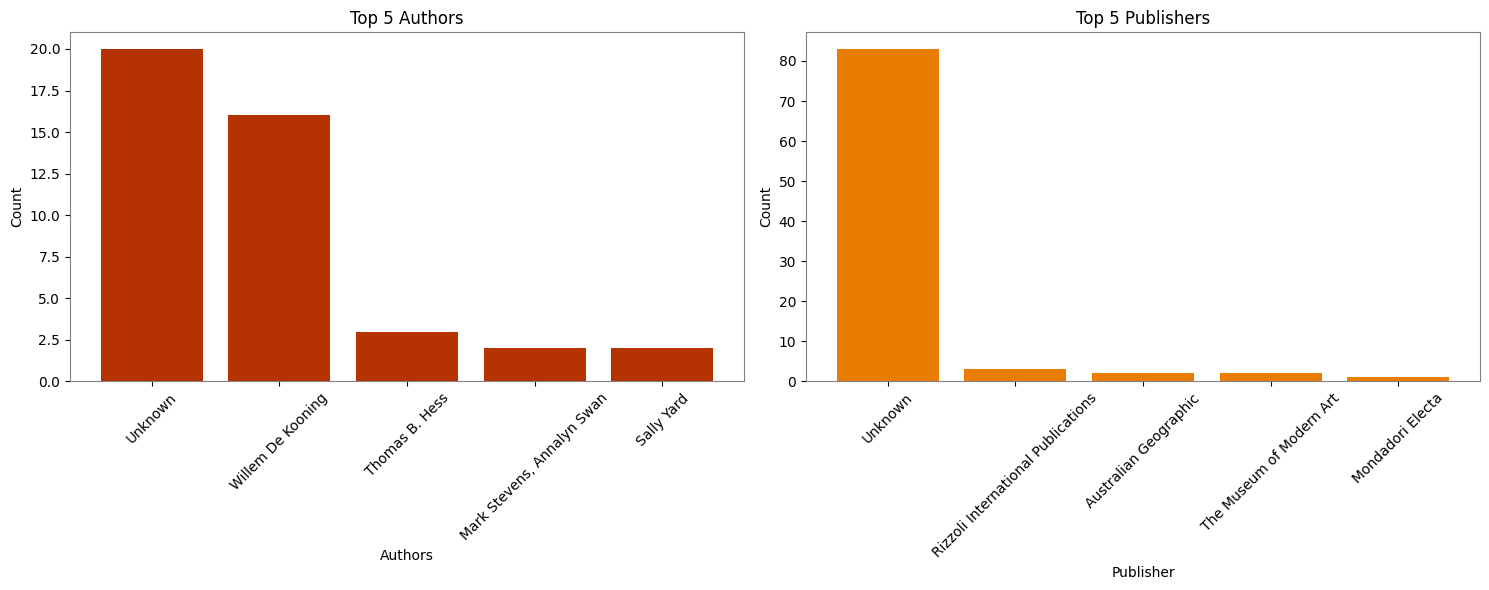

In [78]:
# Plot top 5 authors
top_authors_dk = authors_df_dk.head(5)
# Plot top 5 publishers
top_publishers_dk = publisher_df_dk.head(5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot top 5 authors
axes[0].bar(top_authors_dk['authors'], top_authors_dk['count'], color='#B53302')
axes[0].set_xlabel('Authors')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 5 Authors')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 5 publishers
axes[1].bar(top_publishers_dk['publisher'], top_publishers_dk['count'], color='#E97D01')
axes[1].set_xlabel('Publisher')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 5 Publishers')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


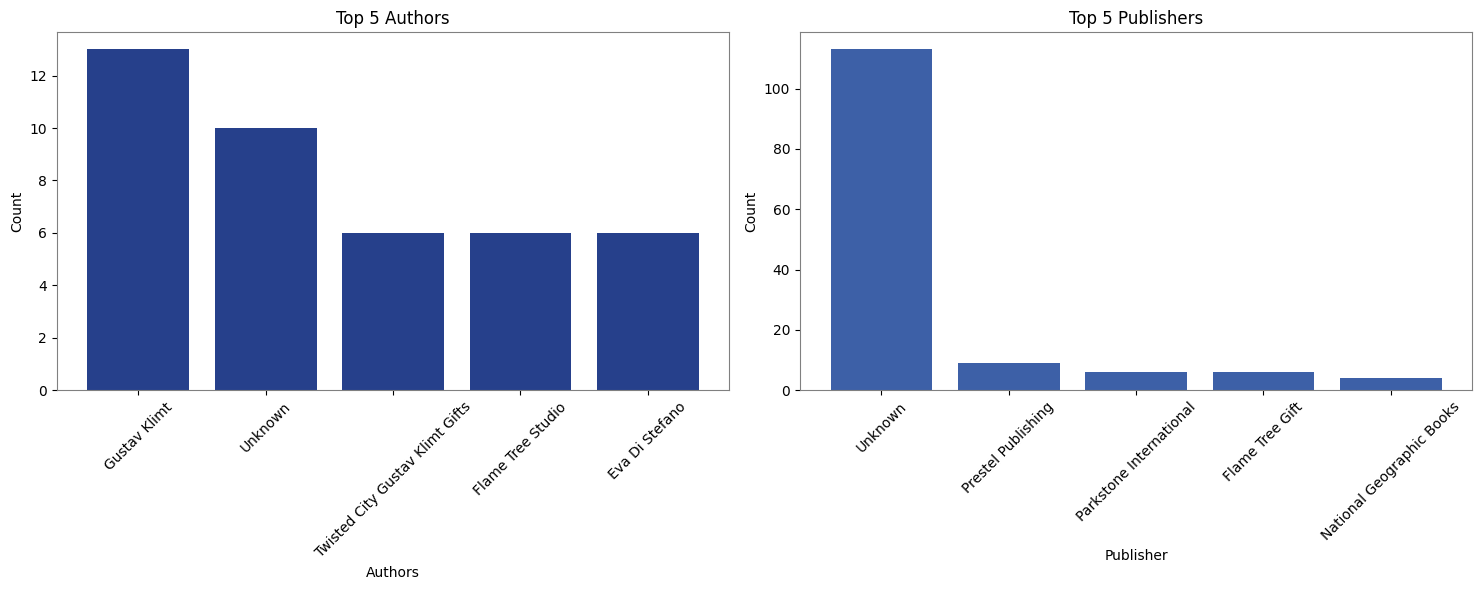

In [79]:

# Plot top 5 authors
top_authors_k = authors_df_k.head(5)
# Plot top 5 publishers
top_publishers_k = publisher_df_k.head(5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot top 5 authors
axes[0].bar(top_authors_k['authors'], top_authors_k['count'], color='#26408B')
axes[0].set_xlabel('Authors')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 5 Authors')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 5 publishers
axes[1].bar(top_publishers_k['publisher'], top_publishers_k['count'], color='#3D60A7')
axes[1].set_xlabel('Publisher')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 5 Publishers')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Exhibitions

## Exhibition by Bibliography - De Kooning

Check how many bibliographic records are actually exhibition catalogues. 

In [80]:
import pandas as pd

total_rows = len(new_df_dk)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = new_df_dk[new_df_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) |
                  new_df_dk['Subtitle'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) ]

# Get the count of rows containing the specified keywords
keyword_rows_count_dk = len(keyword_rows)

print("Total rows in DataFrame:", total_rows)
print("Rows containing specified keywords:", keyword_rows_count_dk)


Total rows in DataFrame: 175
Rows containing specified keywords: 30


In [81]:
# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = new_df_dk['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) | \
       new_df_dk['Subtitle'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_dk = new_df_dk[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_dk = new_df_dk[~mask]

# Reset index of the original DataFrame
dfbooks_dk.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_dk.reset_index(drop=True, inplace=True)

print("\nExhibitions DataFrame:")
exhibitions_dataframe_dk



Exhibitions DataFrame:


,title,Subtitle,publisher,date,isbn,Authors,category
0,"Hartung et les peintres lyriques : Schneider, ...",NaN,Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN,DK
1,Willem de Kooning : drawing seeing-seeing draw...,NaN,"New York : Arena , 1998",1998,0965728080,NaN,DK
2,École de New York : expressionnisme abstrait a...,NaN,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN,DK
3,"Action/abstraction : Pollock, de Kooning, and ...",NaN,"New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN,DK
4,Burri : lo spazio di materia - tra Europa e US...,NaN,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN,DK
5,"Willem De Kooning : the late paintings, the 19...",NaN,San Francisco : San Francisco museum of modern...,1995,0935640479,NaN,DK
6,"American vanguards : Graham, Davis, Gorky, De ...",NaN,Andover (Mass.) : Addison gallery of American ...,2011,0300121679,NaN,DK
7,The impact of Chaim Soutine (1893-1943) : de K...,NaN,"Ostfildern-Ruit : Hatje Cantz , cop. 2002",2002,3775791035,NaN,DK
8,"Willem de Kooning : Retrospektive, Zeichnungen...",NaN,"München : Prestel , cop. 1984",1984,3791306596,NaN,DK
9,"Willem de Kooning : drawings, paintings, sculp...",NaN,New York : Whitney museum of American art ; Mu...,1983,0393018407,NaN,DK


In [82]:
import pandas as pd
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")


# Process Text and Extract Location Names
def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations

exhibitions_dataframe_dk['title'] = exhibitions_dataframe_dk['title'].fillna('')
exhibitions_dataframe_dk['Subtitle'] = exhibitions_dataframe_dk['Subtitle'].fillna('')

# Apply the extract_location function to the 'title' and 'Subtitle' columns and store the result in a new column 'locations'
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk.apply(lambda row: extract_location(row['title'] + ' ' + row['Subtitle']), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_dk['Exhibit locations'] = exhibitions_dataframe_dk['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_dk.to_csv('exhibitions_data_DK.csv', index=False)
exhibitions_dataframe_dk

C:\Users\danie\AppData\Local\Temp\ipykernel_27036\201592113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['title'] = exhibitions_dataframe_dk['title'].fillna('')
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\201592113.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_dk['Subtitle'] = exhibitions_dataframe_dk['Subtitle'].fillna('')
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\201592113.py:18: SettingWithCopyWarning: 
A value is trying to be se

,title,Subtitle,publisher,date,isbn,Authors,category,Exhibit locations
0,"Hartung et les peintres lyriques : Schneider, ...",,Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN,DK,"Gottlieb, De Kooning, Degottex, Mathieu, Polke..."
1,Willem de Kooning : drawing seeing-seeing draw...,,"New York : Arena , 1998",1998,0965728080,NaN,DK,"New York, Andover, Mass., Ohio, Columbus"
2,École de New York : expressionnisme abstrait a...,,"[Nice] : Nice musées , impr. 2005",2005,2913548695,NaN,DK,Nice
3,"Action/abstraction : Pollock, de Kooning, and ...",,"New York : the Jewish museum , cop. 2008",2008,9780300122152,NaN,DK,"New York, Saint Louis, Buffalo, N.Y."
4,Burri : lo spazio di materia - tra Europa e US...,,Città di Castello : Fondazione Palazzo Albizzi...,2016,8894063984,NaN,DK,"Afro, Andre, Arman, Beuys, Capograssi, Castell..."
5,"Willem De Kooning : the late paintings, the 19...",,San Francisco : San Francisco museum of modern...,1995,0935640479,NaN,DK,"San Francisco, Minneapolis, New York"
6,"American vanguards : Graham, Davis, Gorky, De ...",,Andover (Mass.) : Addison gallery of American ...,2011,0300121679,NaN,DK,"N.Y., Fort Worth, Tex., Andover, Mass."
7,The impact of Chaim Soutine (1893-1943) : de K...,,"Ostfildern-Ruit : Hatje Cantz , cop. 2002",2002,3775791035,NaN,DK,Cologne
8,"Willem de Kooning : Retrospektive, Zeichnungen...",,"München : Prestel , cop. 1984",1984,3791306596,NaN,DK,"Ausstellung, New York, Berlin, Paris"
9,"Willem de Kooning : drawings, paintings, sculp...",,New York : Whitney museum of American art ; Mu...,1983,0393018407,NaN,DK,"New York, Berlin, Paris, New York"


In [83]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_dk = exhibitions_dataframe_dk.groupby('date').size().reset_index(name='count')
date_counts_dk = date_counts_dk.sort_values(by='date')

# Display the DataFrame
date_counts_dk.head()

,date,count
0,1968,1
1,1969,1
2,1974,1
3,1976,1
4,1983,2


In [158]:
# # Plotting with seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_dk, x='date', y='count', color='#E97D01')
# plt.title('Exhibitions Count Over Time')
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## Exhibition by Bibliography - Klimt

In [85]:
# Assuming df is your DataFrame

# Count total rows of the DataFrame
total_rows = len(new_df_k)

# Count rows where 'title', 'subtitle', or 'description' contain specified keywords
keyword_rows = new_df_k[new_df_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) |
                  new_df_k['Subtitle'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) ]

# Get the count of rows containing the specified keywords
keyword_rows_count_k = len(keyword_rows)

print("Total rows in DataFrame:", total_rows)
print("Rows containing specified keywords:", keyword_rows_count_k)

Total rows in DataFrame: 323
Rows containing specified keywords: 36


In [86]:
# Assuming df is your original DataFrame

# Create a mask for rows containing specified keywords in 'title', 'subtitle', or 'description' columns
mask = new_df_k['title'].str.contains(r'exhibition|exhib\.|mostra|catalogue |catalogo|exposition|retrospective|Ausstellung', case=False, na=False) | \
       new_df_k['Subtitle'].str.contains(r'exhibition|exhib\.|mostra|catalogue|catalogo|exposition|retrospective|Ausstellung', case=False, na=False) 

# Create the exhibitions DataFrame containing rows where keywords are present
exhibitions_dataframe_k = new_df_k[mask]

# Remove the rows where keywords are present from the original DataFrame
dfbooks_k = new_df_k[~mask]

# Reset index of the original DataFrame
dfbooks_k.reset_index(drop=True, inplace=True)

# Reset index of the exhibitions DataFrame
exhibitions_dataframe_k.reset_index(drop=True, inplace=True)
exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)

# Display the exhibitions DataFrame containing rows where keywords are present
print("\nExhibitions DataFrame:")
exhibitions_dataframe_k.head()


Exhibitions DataFrame:


,title,Subtitle,publisher,date,isbn,Authors,category
0,Klimt and Schiele : drawings from the Albertin...,NaN,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN,K
1,"Gustav Klimt : papiers érotiques, [exposition,...",NaN,[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN,K
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...",NaN,"Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN,K
3,Heiliger Frühling : Gustav Klimt und die Anfän...,NaN,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN,K
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",NaN,Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN,K


In [87]:
import pandas as pd
import spacy
import numpy as np

nlp = spacy.load("en_core_web_sm")

def extract_location(text):
    doc = nlp(text)
    locations = [entity.text for entity in doc.ents if entity.label_ == 'GPE']
    return locations

# Convert NaN values to empty strings in 'title' and 'Subtitle' columns
exhibitions_dataframe_k['title'] = exhibitions_dataframe_k['title'].fillna('')
exhibitions_dataframe_k['Subtitle'] = exhibitions_dataframe_k['Subtitle'].fillna('')

# Apply the extract_location function to the 'title' and 'Subtitle' columns and store the result in a new column 'locations'
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k.apply(lambda row: extract_location(row['title'] + ' ' + row['Subtitle']), axis=1)

# Convert the list of extracted locations into a comma-separated string
exhibitions_dataframe_k['Exhibit locations'] = exhibitions_dataframe_k['Exhibit locations'].apply(lambda x: ', '.join(x))

exhibitions_dataframe_k.to_csv('exhibitions_data_KLI.csv', index=False)
exhibitions_dataframe_k.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_27036\3604181145.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['title'] = exhibitions_dataframe_k['title'].fillna('')
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\3604181145.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exhibitions_dataframe_k['Subtitle'] = exhibitions_dataframe_k['Subtitle'].fillna('')
C:\Users\danie\AppData\Local\Temp\ipykernel_27036\3604181145.py:17: SettingWithCopyWarning: 
A value is trying to be set

,title,Subtitle,publisher,date,isbn,Authors,category,Exhibit locations
0,Klimt and Schiele : drawings from the Albertin...,,"Boston, MA : Museum of Fine Arts, Boston : D.A...",2018,0878468528,NaN,K,"Vienna, Boston"
1,"Gustav Klimt : papiers érotiques, [exposition,...",,[Paris] : Gallimard : Fondation Dina Vierny-Mu...,2005,2070118053,NaN,K,Paris
2,"Il simbolismo : da Moreau a Gauguin a Klimt, m...",,"Ferrara : Ferrara arte , impr. 2007",2007,8889793066,NaN,K,"Ferrara, Ferrara, giugno-16"
3,Heiliger Frühling : Gustav Klimt und die Anfän...,,"Wien ; München : C. Brandstätter , 1999",1999,3854478569,NaN,K,"Farbe, Ausstellung"
4,"Klimt e i maestri ""segreti"" della Ricci Oddi :...",,Piacenza : Galleria d'arte moderna Ricci Oddi ...,2021,9791259580344,NaN,K,"Piacenza, Galleria, Ricci Oddi"


In [88]:
# Assuming 'date' is the column name and exhibitions_dataframe_k is your DataFrame
date_counts_k = exhibitions_dataframe_k.groupby('date').size().reset_index(name='count')
date_counts_k = date_counts_k.sort_values(by='date')

# Display the DataFrame
date_counts_k.head()

,date,count
0,1965,1
1,1966,1
2,1970,1
3,1984,1
4,1994,1


In [89]:
# # Plotting with seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=date_counts_k, x='date', y='count', color='#26408B')
# plt.title('Exhibitions Count Over Time')
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


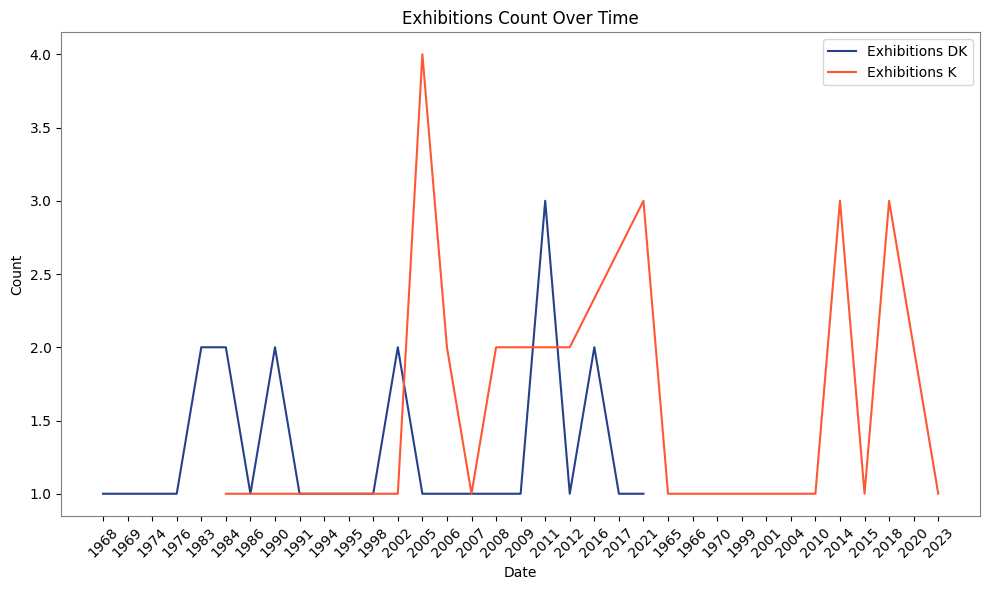

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting with seaborn
sns.lineplot(data=date_counts_dk, x='date', y='count', color='#26408B', label='Exhibitions DK')
sns.lineplot(data=date_counts_k, x='date', y='count', color='#FF5733', label='Exhibitions K')

plt.title('Exhibitions Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


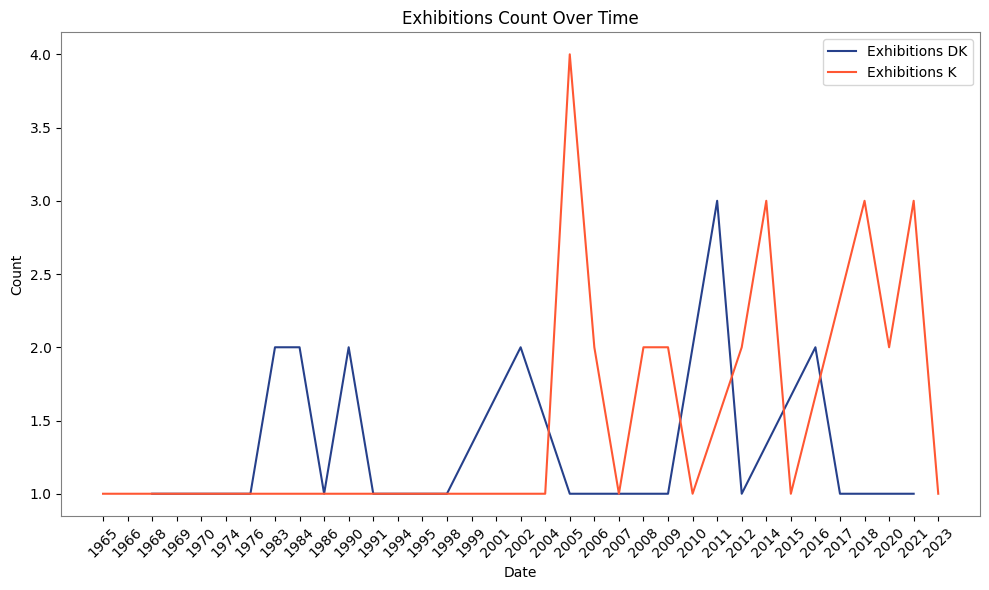

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Outer merge the DataFrames on the 'date' column
merged_df = pd.merge(date_counts_dk, date_counts_k, on='date', how='outer')

# Rename the count columns
merged_df.rename(columns={'count_x': 'Exhibitions DK', 'count_y': 'Exhibitions K'}, inplace=True)

# Sort by 'date'
merged_df.sort_values(by='date', inplace=True)

# Plotting with seaborn
sns.lineplot(data=merged_df, x='date', y='Exhibitions DK', color='#26408B', label='Exhibitions DK')
sns.lineplot(data=merged_df, x='date', y='Exhibitions K', color='#FF5733', label='Exhibitions K')

plt.title('Exhibitions Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [162]:
merged_df.to_csv('../docs/data/comparison_exhibition_per_year.csv')

# De Kooning - a "ground trouth" case

### Complete list of De Kooning's one-man exibitions. 
In our research we considered also the number of exibitions and the venue of the exibitions as parameters in order to check whether the reputation of the artist has changed over the years. However, no complete dataset on artists' exhibitions was found. In order to get an idea on how many exibitions have been covered on catalogues, and, in particular, how many exhibitions are traced by bibliographic records on BnF and Gallica, we needed a "ground truth" to state if those sources of information could be somehow comprehensive. 

The case study is Willem de Kooning, since all data about exibitions are uploaded on the website of the Willem de Kooning Foundation. 
The result of the webscraping are shown here, with a total of 131 exhibitions, 81 possess a catalogue. 

In bibliography_DK.ipynb extraction from SPARQL endpoint of BnF and Google Books API has been done in order to get all bibliographic records on De Kooning - 31 of them are records on exhibitions. So 39% of exibitions with catalogue are present in that dataset, 23% of the total exhibitions are covered. There's also the need to say that the bibliographic records extracted do not concern only one-man shows, so they include further shows that are not present in the dataset reported here below. 


In [91]:
import requests 
from bs4 import BeautifulSoup as bs 

URLs = [
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1940',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1950',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1960',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1970',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1980',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/1990',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2000',
    'https://www.dekooning.org/the-artist/exhibitions/past/one-man/2010'
] 

titles_list = []

for url in URLs: 
    req = requests.get(url) 
    soup = bs(req.text, 'html.parser') 
    
    titles = soup.find_all('p', class_="unit_title spacing_03") 
    
    for title in titles:
        titles_list.append(title.text.strip().replace("\xa0\n", ";").replace("\xa0", ";").replace('\n',';'))


titles_list

['de Kooning;Charles Egan Gallery, New York, New York, (4/12/1948 to 5/12/1948), no catalogue.',
 'Willem de Kooning;Charles Egan Gallery, New York, New York, (4/1/1951 to 4/30/1951), no catalogue.',
 'Willem de Kooning:  Paintings on the Theme of the Woman;Sidney Janis Gallery, New York, New York, (3/16/1953 to 4/11/1953), no catalogue.',
 'Retrospective (de Kooning, 1935-53);Organized by School of the Museum of Fine Arts, Boston, Massachusetts, (4/21/1953 to 7/3/1953), catalogue.',
 'Recent Oils by Willem de Kooning;Martha Jackson Gallery, New York, New York, (11/9/1955 to 12/3/1955), catalogue.',
 'Willem de Kooning:  Recent Paintings;Sidney Janis Gallery, New York, New York, (4/2/1956 to 4/28/1956), no catalogue.',
 'Willem de Kooning;Sidney Janis Gallery, New York, New York, (5/4/1959 to 6/1/1959), no catalogue.',
 'Willem de Kooning;Paul Kantor Gallery, Beverly Hills, California, (4/3/1961 to 4/29/1961), catalogue.',
 'Recent Paintings by Willem de Kooning;Sidney Janis Gallery, N

In [92]:
replacements = {
    "Inc.": "Inc.",
    "and": "and",
    "Science": "Science",
    "Ontario": "",
    "The": "The",
    "Palazzo": "Palazzo",
    "Droll": "Droll",
    "Fourcade": " Fourcade",
    "University": "University",
    "Ishibashi": "Ishibashi",
    "Smithsonian": "Smithsonian",
    "Millbrook": "Millbrook",
    "Seattle": " Seattle",
    "World": "World",
    "Carnegie": "Carnegie",
    "Akademie ": "Akademie ",
    "Berkeley": "Berkeley",
    "Wellesley": "Wellesley",
    "Mitchell-Innes": "Mitchell-Innes",
    "Art": "Art",
    "Colorado": "Colorado"
}

new_list = []

# Iterate through each string in the original list
for item in titles_list:
    # Replace ';(' with ' ('
    item = item.replace(';(', ' (')
    
    # Find the index of the first occurrence of "catalogue." or "brochure."
    catalogue_index = item.find("catalogue.")
    brochure_index = item.find("brochure.")
    
    # Determine the index of the first occurrence among "catalogue." and "brochure."
    if catalogue_index != -1 and brochure_index != -1:
        first_occurrence_index = min(catalogue_index, brochure_index)
    elif catalogue_index != -1:
        first_occurrence_index = catalogue_index
    elif brochure_index != -1:
        first_occurrence_index = brochure_index
    else:
        first_occurrence_index = len(item)
    
    # Slice the string up to the first occurrence
    item = item[:first_occurrence_index + len("catalogue.")]
    
    parts = item.split(';')

    if len(parts) == 2:
        second_part = parts[1]
        # Iterate through each keyword in the replacements dictionary
        for keyword, replacement in replacements.items():
            if ", " in second_part and keyword in second_part:
                # Get the index of the keyword
                keyword_index = second_part.index(keyword)
                # Get the index of the last ", " before the keyword
                comma_index = second_part.rfind(", ", 0, keyword_index)
                # Replace ", " with " " before the keyword
                if comma_index != -1:  # Ensure ", " was found before the keyword
                    second_part = second_part[:comma_index] + " " + second_part[comma_index + 2:]
                # Replace the keyword with the corresponding replacement
                second_part = second_part.replace(keyword, replacement)
        # Split the second part (after ';') by ','
        second_parts = second_part.split(',')
        # Remove the third element if the length is greater than 5
        if len(second_parts) > 5:
            del second_parts[1]
        # Create a sublist with the first part and the second parts
        sublist = [parts[0]] + second_parts
        # Append the sublist to the new list
        new_list.append(sublist)

print(new_list)


[['de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/12/1948 to 5/12/1948)', ' no catalogue.'], ['Willem de Kooning', 'Charles Egan Gallery', ' New York', ' New York', ' (4/1/1951 to 4/30/1951)', ' no catalogue.'], ['Willem de Kooning:  Paintings on the Theme of the Woman', 'Sidney Janis Gallery', ' New York', ' New York', ' (3/16/1953 to 4/11/1953)', ' no catalogue.'], ['Retrospective (de Kooning, 1935-53)', 'Organized by School of the Museum of Fine Arts', ' Boston', ' Massachusetts', ' (4/21/1953 to 7/3/1953)', ' catalogue.'], ['Recent Oils by Willem de Kooning', 'Martha Jackson Gallery', ' New York', ' New York', ' (11/9/1955 to 12/3/1955)', ' catalogue.'], ['Willem de Kooning:  Recent Paintings', 'Sidney Janis Gallery', ' New York', ' New York', ' (4/2/1956 to 4/28/1956)', ' no catalogue.'], ['Willem de Kooning', 'Sidney Janis Gallery', ' New York', ' New York', ' (5/4/1959 to 6/1/1959)', ' no catalogue.'], ['Willem de Kooning', 'Paul Kantor Gallery', ' Beverly H

In [93]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Initialize empty lists for each column
exhibition = []
venue = []
city = []
state = []
date = []
catalogue = []

# Populate the lists from the data in x
for i in new_list:
    if len(i) >= 6:
        exhibition.append(i[0])
        venue.append(i[1])
        city.append(i[2])
        state.append(i[3])
        date.append(i[4])
        catalogue.append(i[5])


df = pd.DataFrame(columns=["Exhibition_name", "Venue", "City", 'State', 'date', 'catalogue'])

df['Exhibition_name'] = exhibition
df['Venue'] = venue
df['City'] = city
df['State'] = state
df['date'] = date
df['catalogue'] = catalogue

df.head()

,Exhibition_name,Venue,City,State,date,catalogue
0,de Kooning,Charles Egan Gallery,New York,New York,(4/12/1948 to 5/12/1948),no catalogue.
1,Willem de Kooning,Charles Egan Gallery,New York,New York,(4/1/1951 to 4/30/1951),no catalogue.
2,Willem de Kooning: Paintings on the Theme of ...,Sidney Janis Gallery,New York,New York,(3/16/1953 to 4/11/1953),no catalogue.
3,"Retrospective (de Kooning, 1935-53)",Organized by School of the Museum of Fine Arts,Boston,Massachusetts,(4/21/1953 to 7/3/1953),catalogue.
4,Recent Oils by Willem de Kooning,Martha Jackson Gallery,New York,New York,(11/9/1955 to 12/3/1955),catalogue.


In [94]:
count_dict = {}
for element in df['catalogue']:
    if element not in count_dict:
        count_dict[element] = 1  
    else:
        count_dict[element] += 1  

print(count_dict)

{' no catalogue.': 47, ' catalogue.': 79, ' catalogue': 2, ' brochure.': 4}


In [95]:
def extract_date_range(date_str):
    # Split the date range string
    dates = date_str.strip('()').split(' to ')
    # Convert each date to datetime format
    return [pd.to_datetime(date, errors='coerce') for date in dates]

# Apply the function to the 'date' column to create a new column with datetime objects
df['date_range'] = df['date'].apply(extract_date_range)

# Function to check if any part of the date range falls within the desired range (2004-2014)
def within_desired_range(date_range):
    start_date = pd.Timestamp('2004-01-01')
    end_date = pd.Timestamp('2014-12-31')
    return any((start_date <= date <= end_date) for date in date_range if pd.notnull(date))

# Filter rows based on whether any part of the date range falls within the desired range
filtered_df = df[df['date_range'].apply(within_desired_range)]

filtered_df.reset_index(drop=True, inplace=True)

filtered_df.drop('date_range', axis=1, inplace=True)

# Display the filtered DataFrame
filtered_df


C:\Users\danie\AppData\Local\Temp\ipykernel_27036\1739004514.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('date_range', axis=1, inplace=True)


,Exhibition_name,Venue,City,State,date,catalogue
0,Willem de Kooning: Works on Paper and Selected...,Organized by Paul Thiebaud Gallery,San Francisco,California,(1/8/2002 to 6/18/2005),catalogue.
1,Willem de Kooning: A Centennial Exhibition,Gagosian Gallery,New York,New York,(4/24/2004 to 6/19/2004),catalogue.
2,de Kooning: Paintings from the Forties and Fi...,Richard Gray Gallery,New York,New York,(5/1/2004 to 5/29/2004),no catalogue.
3,"Garden in Delft: de Kooning Landscapes, 1928-...",Mitchell-Innes & Nash,New York,New York,(5/3/2004 to 6/26/2004),catalogue.
4,Willem de Kooning,Organized by BA-CA Kunstforum,Vienna,Austria,(1/13/2005 to 7/3/2005),catalogue.
5,"Willem de Kooning: Zeichnungen, Aquarelle, Pas...",Galerie Fred Jahn,Munich,Germany,(9/9/2005 to 10/14/2005),no catalogue.
6,"Willem de Kooning: Paintings, 1975-1978",L&M Arts,New York,New York,(4/20/2006 to 6/3/2006),catalogue.
7,Willem de Kooning: Sketchbook,Matthew Marks Gallery,New York,New York,(5/5/2006 to 6/17/2006),catalogue.
8,Willem de Kooning: Slipping Glimpses 1920s to...,Allan Stone Gallery Art Basel Miami Beach,Miami Beach,Florida,(12/7/2006 to 12/10/2006),catalogue.
9,Willem de Kooning: Women,Craig F. Starr Associates,New York,New York,(4/12/2007 to 6/8/2007),brochure.


In [96]:
# INSERIRE DATI

# Now the real question
## Is there any correlation?

In [219]:
#new_dataframe_dk

import pandas as pd

# Assuming 'soldtime' is the column name and final_auctions_dk is your DataFrame
soldtime_counts = final_auctions_dk['soldtime'].value_counts().reset_index()
soldtime_counts.columns = ['soldtime', 'count']

# Sort the DataFrame based on 'soldtime'
soldtime_counts_sorted = soldtime_counts.sort_values(by='soldtime')
# Convert 'soldtime' values to type object
soldtime_counts_sorted['soldtime'] = soldtime_counts_sorted['soldtime'].astype(str)

# Output the DataFrame after conversion
soldtime_counts_sorted



,soldtime,count
1,2008,48
6,2009,17
5,2010,34
2,2011,45
3,2012,41
0,2013,82
4,2014,40


In [217]:
# new_df_dk = new_df_dk.sort_values(by="date")
# Assuming 'soldtime' is the column name and final_auctions_dk is your DataFrame
publications_counts = new_df_dk['date'].value_counts().reset_index()
publications_counts.columns = ['soldtime', 'count']

# Sort the DataFrame based on 'soldtime'
publications_counts = publications_counts.sort_values(by='soldtime')

publications_counts.reset_index(drop=True, inplace=True)

publications_counts

# Drop the last row
publications_counts.drop(publications_counts.tail(1).index, inplace=True)


publications_counts

,soldtime,count
0,1953,1
1,1959,2
2,1960,1
3,1962,2
4,1963,2
5,1965,1
6,1967,1
7,1968,4
8,1969,2
9,1972,1


In [221]:
# Merge the two DataFrames on 'soldtime' from left and 'date' from right
selling_publication_df = pd.merge(soldtime_counts_sorted, publications_counts, on='soldtime', how='inner',  suffixes=('-selling', '-publication'))

# Output the merged DataFrame
selling_publication_df



,soldtime,count-selling,count-publication
0,2008,48,3
1,2009,17,2
2,2010,34,2
3,2011,45,7
4,2012,41,1
5,2014,40,2


In [222]:
# Calculate correlation
correlation_selling_publication = selling_publication_df['count-selling'].corr(selling_publication_df['count-publication'])

# Display the correlation
print("Correlation between count_selling and count_publication:", correlation_selling_publication)


Correlation between count_selling and count_publication: 0.3747631421959791


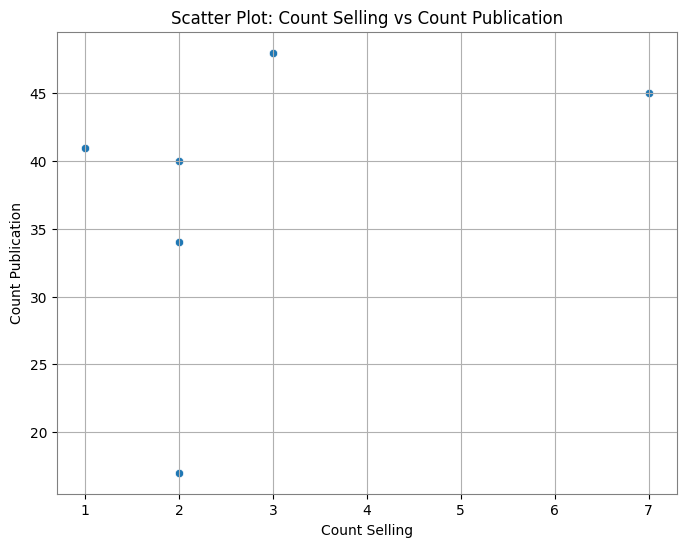

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selling_publication_df, y='count-selling', x='count-publication')
plt.title('Scatter Plot: Count Selling vs Count Publication')
plt.xlabel('Count Selling')
plt.ylabel('Count Publication')
plt.grid(True)
plt.show()


In [245]:
# mean_price_per_year_k

# Assuming mean_price_per_year_k is your Series
mean_price_per_year_k_df = mean_price_per_year_k.reset_index()

# Rename the columns
mean_price_per_year_k_df['soldtime'] = mean_price_per_year_k_df['soldtime'].astype(str)

# Output the DataFrame
mean_price_per_year_k_df

,soldtime,price
0,2004,1895017.14
1,2005,282144.59
2,2006,54654695.31
3,2007,726252.35
4,2008,795700.67
5,2009,706580.00
6,2010,26130432.22
7,2011,584293.33
8,2012,422732.94
9,2013,759401.43


In [251]:
# Convert 'soldtime' columns to string data type
mean_price_per_year_k_df['soldtime'] = mean_price_per_year_dk_df['soldtime'].astype(str)
publications_counts['soldtime'] = publications_counts['soldtime'].astype(str)

# Merge the two DataFrames on 'soldtime' column
mean_selling_publication_df = mean_price_per_year_k_df.merge( publications_counts, on='soldtime', how='inner')

# Output the merged DataFrame
mean_selling_publication_df


,soldtime,price,count
0,2008,282144.59,3
1,2011,54654695.31,7
2,2012,726252.35,1
3,2014,795700.67,2
4,2010,706580.00,2
5,2009,26130432.22,2


In [252]:
# Calculate correlation
correlation_meanprice_publication = mean_selling_publication_df['price'].corr(mean_selling_publication_df['count'])

# Display the correlation
print("Correlation between count_selling and count_publication:", correlation_meanprice_publication)


Correlation between count_selling and count_publication: 0.8487995919408963


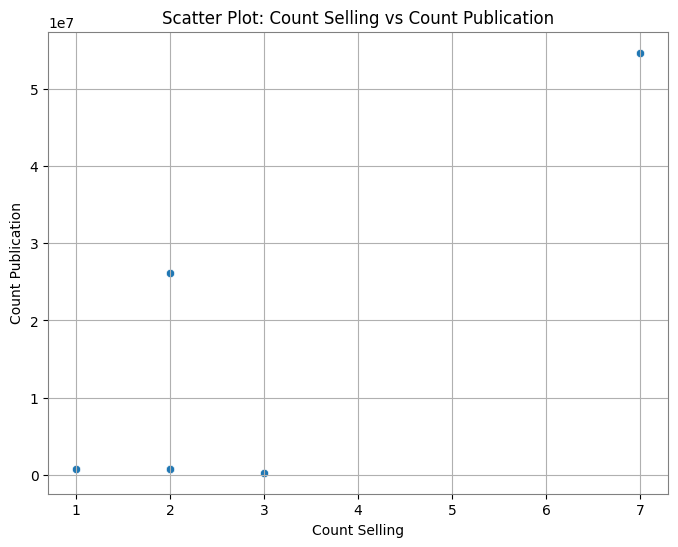

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mean_selling_publication_df, y='price', x='count')
plt.title('Scatter Plot: Count Selling vs Count Publication')
plt.xlabel('Count Selling')
plt.ylabel('Count Publication')
plt.grid(True)
plt.show()